<a href="https://colab.research.google.com/github/CristinaCielma/Segunda-pre-entrega-del-proyecto-final_Arevalo-Cielma/blob/main/Copia_de_Segunda_Entrega_Arevalo_Cielma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Abstracto de motivación y audiencia

En los últimos años, las criptomonedas han tenido una evolución importante en las inversiones de miles de personas a lo largo del mundo, quienes han encontrado a través de estos criptoactivos, un medio de intercambio que permite no sólo hacer transacciones en el mundo tan globalizado en el que nos encontramos, sino que principalmente se constituye como refugio de valor ante las variaciones de las monedas que se han considerado como tales a lo largo del tiempo y que en los últimos años han tenido una vulnerabilidad importante ante las inseguridades económicas que se plantean en las transacciones y en los modelos macroeconómicos que nos rodean, tanto en países emergentes como no emergentes. 

A través del dataset encontrado, y con diferentes inputs como: fecha, nombre de cripto, precio en USD, market_cap y volumen, podremos analizar la evolución de las operaciones con criptomonedas considerando el volumen operado de las principales.

El público de interés, serán todos aquellos inversores que buscan una alternativa al mercado de capitales, que deseen evaluar el rendimiento de estos criptoactivos a lo largo del tiempo, y los posibles pronósticos a futuro y variables de interés que deberán seguir de cerca para evaluar las posibilidades de volcarse a lo mismo, considerando que preferentemente deberán ser inversores de largo plazo, por el tiempo que demanda obtener buenos resultados.


##Preguntas/Hipótesis de interés:

Plantearemos algunas hipótesis:

1- ¿podrá predecirse el valor futuro de las criptomonedas analizadas a partir del comportamiento que revelaron hasta el año 2021?

2- ¿Podemos identificar cuáles son los patrones que determinan los cambios de tendencia?

3- ¿Existen inversiones de largo plazo o corto plazo?


Tomaremos el caso de BTC (Bitcoin), ETH (Ethereum) y USDT (Tether) como valores significativos.

#Exploración de datos (EDA)


##Elección DataSet

In [5]:
#importamos el dataset
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1wYFFMI4n1a-ZN1ft6zlBo1anSpSTpTR-"})
downloaded.GetContentFile('crypto_tradinds.csv')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


df_cryp = pd.read_csv("crypto_tradinds.csv", low_memory=False)
df_cryp.head()

trade_date      volume  price_usd  price_btc    market_cap  \
0  2016-01-01  36278900.0     434.33        1.0  6.529300e+09   
1  2016-01-02  30096600.0     433.44        1.0  6.517390e+09   
2  2016-01-03  39633800.0     430.01        1.0  6.467430e+09   
3  2016-01-04  38477500.0     433.09        1.0  6.515713e+09   
4  2016-01-05  34522600.0     431.96        1.0  6.500393e+09   

   capitalization_change_1_day  USD_price_change_1_day  \
0                     0.000000                0.000000   
1                    -0.001824               -0.002049   
2                    -0.007666               -0.007913   
3                     0.007466                0.007163   
4                    -0.002351               -0.002609   

   BTC_price_change_1_day crypto_name  crypto_type ticker  max_supply  \
0                     0.0     Bitcoin          0.0    BTC  21000000.0   
1                     0.0     Bitcoin          0.0    BTC  21000000.0   
2                     0.0     Bitcoin          0.0    BTC  21000000.0   
3                     0.0     Bitcoin          0.0    BTC  21000000.0   
4                     0.0     Bitcoin          0.0    BTC  21000000.0   

               site_url                   github_url  minable platform_name  \
0  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
1  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
2  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
3  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
4  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   

         industry_name  
0  Proof of Work (PoW)  
1  Proof of Work (PoW)  
2  Proof of Work (PoW)  
3  Proof of Work (PoW)  
4  Proof of Work (PoW)

In [6]:
df_cryp.isnull()

trade_date  volume  price_usd  price_btc  market_cap  \
0             False   False      False      False       False   
1             False   False      False      False       False   
2             False   False      False      False       False   
3             False   False      False      False       False   
4             False   False      False      False       False   
...             ...     ...        ...        ...         ...   
2382638       False   False      False      False       False   
2382639       False   False      False      False       False   
2382640       False   False      False      False       False   
2382641       False   False      False      False       False   
2382642       False   False      False      False       False   

         capitalization_change_1_day  USD_price_change_1_day  \
0                              False                   False   
1                              False                   False   
2                              False                   False   
3                              False                   False   
4                              False                   False   
...                              ...                     ...   
2382638                        False                   False   
2382639                        False                   False   
2382640                        False                   False   
2382641                        False                   False   
2382642                        False                   False   

         BTC_price_change_1_day  crypto_name  crypto_type  ticker  max_supply  \
0                         False        False        False   False       False   
1                         False        False        False   False       False   
2                         False        False        False   False       False   
3                         False        False        False   False       False   
4                         False        False        False   False       False   
...                         ...          ...          ...     ...         ...   
2382638                   False        False        False   False       False   
2382639                   False        False        False   False       False   
2382640                   False        False        False   False       False   
2382641                   False        False        False   False       False   
2382642                   False        False        False   False       False   

         site_url  github_url  minable  platform_name  industry_name  
0           False       False    False          False          False  
1           False       False    False          False          False  
2           False       False    False          False          False  
3           False       False    False          False          False  
4           False       False    False          False          False  
...           ...         ...      ...            ...            ...  
2382638     False       False    False           True           True  
2382639     False       False    False           True           True  
2382640     False       False    False           True           True  
2382641     False       False    False           True           True  
2382642     False       False    False           True           True  

[2382643 rows x 17 columns]

In [7]:
df_cryp.isnull().sum().sum()

4862194

In [8]:
df_cryp.fillna(0, inplace=True)
df_cryp.head().round(2)

trade_date      volume  price_usd  price_btc    market_cap  \
0  2016-01-01  36278900.0     434.33        1.0  6.529300e+09   
1  2016-01-02  30096600.0     433.44        1.0  6.517390e+09   
2  2016-01-03  39633800.0     430.01        1.0  6.467430e+09   
3  2016-01-04  38477500.0     433.09        1.0  6.515713e+09   
4  2016-01-05  34522600.0     431.96        1.0  6.500393e+09   

   capitalization_change_1_day  USD_price_change_1_day  \
0                         0.00                    0.00   
1                        -0.00                   -0.00   
2                        -0.01                   -0.01   
3                         0.01                    0.01   
4                        -0.00                   -0.00   

   BTC_price_change_1_day crypto_name  crypto_type ticker  max_supply  \
0                     0.0     Bitcoin          0.0    BTC  21000000.0   
1                     0.0     Bitcoin          0.0    BTC  21000000.0   
2                     0.0     Bitcoin          0.0    BTC  21000000.0   
3                     0.0     Bitcoin          0.0    BTC  21000000.0   
4                     0.0     Bitcoin          0.0    BTC  21000000.0   

               site_url                   github_url  minable platform_name  \
0  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
1  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
2  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
3  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
4  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   

         industry_name  
0  Proof of Work (PoW)  
1  Proof of Work (PoW)  
2  Proof of Work (PoW)  
3  Proof of Work (PoW)  
4  Proof of Work (PoW)

In [9]:
df_cryp.shape

(2382643, 17)

In [10]:
df_cryp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382643 entries, 0 to 2382642
Data columns (total 17 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   trade_date                   object 
 1   volume                       float64
 2   price_usd                    float64
 3   price_btc                    float64
 4   market_cap                   float64
 5   capitalization_change_1_day  float64
 6   USD_price_change_1_day       float64
 7   BTC_price_change_1_day       float64
 8   crypto_name                  object 
 9   crypto_type                  float64
 10  ticker                       object 
 11  max_supply                   float64
 12  site_url                     object 
 13  github_url                   object 
 14  minable                      float64
 15  platform_name                object 
 16  industry_name                object 
dtypes: float64(10), object(7)
memory usage: 309.0+ MB


Será necesario transformar el formato de fecha para futuros análisis de series de tiempo. Procedemos a esa transformación

In [11]:
df_cryp['date_f']=pd.DatetimeIndex(pd.to_datetime(df_cryp['trade_date']))
df_cryp.head()

trade_date      volume  price_usd  price_btc    market_cap  \
0  2016-01-01  36278900.0     434.33        1.0  6.529300e+09   
1  2016-01-02  30096600.0     433.44        1.0  6.517390e+09   
2  2016-01-03  39633800.0     430.01        1.0  6.467430e+09   
3  2016-01-04  38477500.0     433.09        1.0  6.515713e+09   
4  2016-01-05  34522600.0     431.96        1.0  6.500393e+09   

   capitalization_change_1_day  USD_price_change_1_day  \
0                     0.000000                0.000000   
1                    -0.001824               -0.002049   
2                    -0.007666               -0.007913   
3                     0.007466                0.007163   
4                    -0.002351               -0.002609   

   BTC_price_change_1_day crypto_name  crypto_type ticker  max_supply  \
0                     0.0     Bitcoin          0.0    BTC  21000000.0   
1                     0.0     Bitcoin          0.0    BTC  21000000.0   
2                     0.0     Bitcoin          0.0    BTC  21000000.0   
3                     0.0     Bitcoin          0.0    BTC  21000000.0   
4                     0.0     Bitcoin          0.0    BTC  21000000.0   

               site_url                   github_url  minable platform_name  \
0  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
1  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
2  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
3  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
4  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   

         industry_name     date_f  
0  Proof of Work (PoW) 2016-01-01  
1  Proof of Work (PoW) 2016-01-02  
2  Proof of Work (PoW) 2016-01-03  
3  Proof of Work (PoW) 2016-01-04  
4  Proof of Work (PoW) 2016-01-05

In [12]:
df_cryp['year']=pd.DatetimeIndex(pd.to_datetime(df_cryp['trade_date'])).to_period('Y')
df_cryp.head()

trade_date      volume  price_usd  price_btc    market_cap  \
0  2016-01-01  36278900.0     434.33        1.0  6.529300e+09   
1  2016-01-02  30096600.0     433.44        1.0  6.517390e+09   
2  2016-01-03  39633800.0     430.01        1.0  6.467430e+09   
3  2016-01-04  38477500.0     433.09        1.0  6.515713e+09   
4  2016-01-05  34522600.0     431.96        1.0  6.500393e+09   

   capitalization_change_1_day  USD_price_change_1_day  \
0                     0.000000                0.000000   
1                    -0.001824               -0.002049   
2                    -0.007666               -0.007913   
3                     0.007466                0.007163   
4                    -0.002351               -0.002609   

   BTC_price_change_1_day crypto_name  crypto_type ticker  max_supply  \
0                     0.0     Bitcoin          0.0    BTC  21000000.0   
1                     0.0     Bitcoin          0.0    BTC  21000000.0   
2                     0.0     Bitcoin          0.0    BTC  21000000.0   
3                     0.0     Bitcoin          0.0    BTC  21000000.0   
4                     0.0     Bitcoin          0.0    BTC  21000000.0   

               site_url                   github_url  minable platform_name  \
0  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
1  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
2  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
3  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   
4  https://bitcoin.org/  https://github.com/bitcoin/      1.0           XRP   

         industry_name     date_f  year  
0  Proof of Work (PoW) 2016-01-01  2016  
1  Proof of Work (PoW) 2016-01-02  2016  
2  Proof of Work (PoW) 2016-01-03  2016  
3  Proof of Work (PoW) 2016-01-04  2016  
4  Proof of Work (PoW) 2016-01-05  2016

###Feature Selection

A partir del df obtenido en el paso anterior _df_cr_reg_bit_, en primera instancia consideramos interesante la relación que podría establecerse entre el precio del BTC y algunas variables que pudieran ser relevantes.

Para nuestro caso elegiremos: 

Volume: Cantidad de operaciones por día

market_cap: valor total de las acciones en circulación de una empresa

price_dia_ant: valor calculado del precio del día anterior, a partir de 

USD_price_change_1_day. 

date_f: lo establecemos como índice para crear un modelo ARIMA.

Sacamos del modelo las variables ticker, ya que en nuestro caso está filtrado sólo para BTC Y USD_price_change_1_day porque es la variable que utilizamos para calcular el precio del día anterior.

In [13]:
from datetime import datetime, timedelta
df_cr_r=df_cryp[['volume','price_usd','market_cap','ticker','date_f','USD_price_change_1_day']]
df_cr_r.head()

volume  price_usd    market_cap ticker     date_f  \
0  36278900.0     434.33  6.529300e+09    BTC 2016-01-01   
1  30096600.0     433.44  6.517390e+09    BTC 2016-01-02   
2  39633800.0     430.01  6.467430e+09    BTC 2016-01-03   
3  38477500.0     433.09  6.515713e+09    BTC 2016-01-04   
4  34522600.0     431.96  6.500393e+09    BTC 2016-01-05   

   USD_price_change_1_day  
0                0.000000  
1               -0.002049  
2               -0.007913  
3                0.007163  
4               -0.002609

In [14]:
df_cr_r['price_dia_ant']=df_cr_r['price_usd']*(1+df_cr_r['USD_price_change_1_day']*(-1))
df_cr_r['variacion_precio']=(df_cr_r['price_usd']-df_cr_r['price_dia_ant'])/(df_cr_r['price_dia_ant'])
df_cr_r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


volume  price_usd    market_cap ticker     date_f  \
0  36278900.0     434.33  6.529300e+09    BTC 2016-01-01   
1  30096600.0     433.44  6.517390e+09    BTC 2016-01-02   
2  39633800.0     430.01  6.467430e+09    BTC 2016-01-03   
3  38477500.0     433.09  6.515713e+09    BTC 2016-01-04   
4  34522600.0     431.96  6.500393e+09    BTC 2016-01-05   

   USD_price_change_1_day  price_dia_ant  variacion_precio  
0                0.000000     434.330000          0.000000  
1               -0.002049     434.328176         -0.002045  
2               -0.007913     433.412857         -0.007851  
3                0.007163     429.987939          0.007214  
4               -0.002609     433.087052         -0.002602

##Analizando la API

Agregamos a la información obtenida lo que descargaremos de la API de yahoo finance, sobre la información de los años bajo estudio:

In [15]:
import requests
import json
import numpy as np
import pandas as pd

In [16]:
from pandas_datareader import data as pdr

In [17]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Procedemos a rescatar la info de BTC, ETH y USDT tanto del dataset como de la API para poder hacer los join correspondientes y analizar la información que hemos obtenido:


##BTC

Bitcoin es una moneda que, a diferencia de las monedas tradicionales que tiene cada pais, es electrónica y no es física, por lo que las transacciones siempre se realizan en linea.

Como se trata de la primera divisa digital que apareció en el mercado y se mantuvo en el tiempo es una de las mas confiables.

Analizaremos el caso de BTC, para lo cual primero ejecutaremos la tabla a través de la API de Yahoo Finance, analizaremos los valores nulos y duplicados y exploraremos los valores percibidos.

In [18]:
df_cr_reg_bit=df_cr_r.query("ticker=='BTC'")
df_cr_reg_bit.head()

volume  price_usd    market_cap ticker     date_f  \
0  36278900.0     434.33  6.529300e+09    BTC 2016-01-01   
1  30096600.0     433.44  6.517390e+09    BTC 2016-01-02   
2  39633800.0     430.01  6.467430e+09    BTC 2016-01-03   
3  38477500.0     433.09  6.515713e+09    BTC 2016-01-04   
4  34522600.0     431.96  6.500393e+09    BTC 2016-01-05   

   USD_price_change_1_day  price_dia_ant  variacion_precio  
0                0.000000     434.330000          0.000000  
1               -0.002049     434.328176         -0.002045  
2               -0.007913     433.412857         -0.007851  
3                0.007163     429.987939          0.007214  
4               -0.002609     433.087052         -0.002602

In [19]:
df_cr_r_bit=df_cr_reg_bit[['date_f','volume','price_usd','market_cap','price_dia_ant']]
df_cr_r_bit= df_cr_r_bit.set_index('date_f')
df_cr_r_bit.sort_index(inplace=True)
df_cr_r_bit.head()

volume  price_usd    market_cap  price_dia_ant
date_f                                                        
2016-01-01  36278900.0     434.33  6.529300e+09     434.330000
2016-01-02  30096600.0     433.44  6.517390e+09     434.328176
2016-01-03  39633800.0     430.01  6.467430e+09     433.412857
2016-01-04  38477500.0     433.09  6.515713e+09     429.987939
2016-01-05  34522600.0     431.96  6.500393e+09     433.087052

In [20]:
yf.pdr_override() 
df_BTC = pdr.get_data_yahoo("BTC-USD", start="2016-01-01", end="2022-09-30")

[*********************100%***********************]  1 of 1 completed


In [21]:
df_BTC.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-01  430.721008  436.246002  427.515015  434.334015  434.334015   
2016-01-02  434.622009  436.062012  431.869995  433.437988  433.437988   
2016-01-03  433.578003  433.743011  424.705994  430.010986  430.010986   
2016-01-04  430.061005  434.516998  429.084015  433.091003  433.091003   
2016-01-05  433.069000  434.182007  429.675995  431.959991  431.959991   

              Volume  
Date                  
2016-01-01  36278900  
2016-01-02  30096600  
2016-01-03  39633800  
2016-01-04  38477500  
2016-01-05  34522600

In [22]:
df_BTC.duplicated()

Date
2016-01-01    False
2016-01-02    False
2016-01-03    False
2016-01-04    False
2016-01-05    False
              ...  
2022-09-25    False
2022-09-26    False
2022-09-27    False
2022-09-28    False
2022-09-29    False
Length: 2464, dtype: bool

In [23]:
df_BTC.duplicated().sum().sum()

0

In [24]:
df_BTC.isnull()

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2016-01-01  False  False  False  False      False   False
2016-01-02  False  False  False  False      False   False
2016-01-03  False  False  False  False      False   False
2016-01-04  False  False  False  False      False   False
2016-01-05  False  False  False  False      False   False
...           ...    ...    ...    ...        ...     ...
2022-09-25  False  False  False  False      False   False
2022-09-26  False  False  False  False      False   False
2022-09-27  False  False  False  False      False   False
2022-09-28  False  False  False  False      False   False
2022-09-29  False  False  False  False      False   False

[2464 rows x 6 columns]

In [25]:
df_BTC.isnull().sum().sum()

0

In [26]:
df_BTC.isnull().sum(axis=1)

Date
2016-01-01    0
2016-01-02    0
2016-01-03    0
2016-01-04    0
2016-01-05    0
             ..
2022-09-25    0
2022-09-26    0
2022-09-27    0
2022-09-28    0
2022-09-29    0
Length: 2464, dtype: int64

In [27]:
df_BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2464 entries, 2016-01-01 to 2022-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2464 non-null   float64
 1   High       2464 non-null   float64
 2   Low        2464 non-null   float64
 3   Close      2464 non-null   float64
 4   Adj Close  2464 non-null   float64
 5   Volume     2464 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 134.8 KB


In [28]:
df_BTC['date_f']=df_BTC.index

In [29]:
df_BTC.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-01  430.721008  436.246002  427.515015  434.334015  434.334015   
2016-01-02  434.622009  436.062012  431.869995  433.437988  433.437988   
2016-01-03  433.578003  433.743011  424.705994  430.010986  430.010986   
2016-01-04  430.061005  434.516998  429.084015  433.091003  433.091003   
2016-01-05  433.069000  434.182007  429.675995  431.959991  431.959991   

              Volume     date_f  
Date                             
2016-01-01  36278900 2016-01-01  
2016-01-02  30096600 2016-01-02  
2016-01-03  39633800 2016-01-03  
2016-01-04  38477500 2016-01-04  
2016-01-05  34522600 2016-01-05

####Uniendo API y Data Set

In [30]:
BTC=pd.merge(df_cr_reg_bit, df_BTC, how='inner', on='date_f')[['date_f','market_cap','price_dia_ant','variacion_precio','Open','High','Low','Close','Adj Close','Volume']]
BTC

date_f    market_cap  price_dia_ant  variacion_precio          Open  \
0    2016-01-01  6.529300e+09     434.330000          0.000000    430.721008   
1    2016-01-02  6.517390e+09     434.328176         -0.002045    434.622009   
2    2016-01-03  6.467430e+09     433.412857         -0.007851    433.578003   
3    2016-01-04  6.515713e+09     429.987939          0.007214    430.061005   
4    2016-01-05  6.500393e+09     433.087052         -0.002602    433.069000   
...         ...           ...            ...               ...           ...   
1741 2020-10-29  2.489953e+11   13269.198852          0.012712  13271.298828   
1742 2020-10-30  2.510182e+11   13437.001688          0.008151  13437.874023   
1743 2020-10-31  2.553721e+11   13542.461675          0.017613  13546.532227   
1744 2020-11-01  2.545698e+11   13780.850282         -0.003174  13780.995117   
1745 2020-11-02  2.511199e+11   13734.574749         -0.013403  13737.032227   

              High           Low         Close     Adj Close       Volume  
0       436.246002    427.515015    434.334015    434.334015     36278900  
1       436.062012    431.869995    433.437988    433.437988     30096600  
2       433.743011    424.705994    430.010986    430.010986     39633800  
3       434.516998    429.084015    433.091003    433.091003     38477500  
4       434.182007    429.675995    431.959991    431.959991     34522600  
...            ...           ...           ...           ...          ...  
1741  13612.047852  12980.059570  13437.882812  13437.882812  56499499598  
1742  13651.516602  13136.198242  13546.522461  13546.522461  30581485201  
1743  14028.213867  13457.530273  13780.995117  13780.995117  30306464719  
1744  13862.033203  13628.377930  13737.109375  13737.109375  24453857900  
1745  13808.323242  13243.160156  13550.489258  13550.489258  30771455468  

[1746 rows x 10 columns]

In [31]:
BTC_I=BTC.set_index('date_f')
BTC_I

market_cap  price_dia_ant  variacion_precio          Open  \
date_f                                                                    
2016-01-01  6.529300e+09     434.330000          0.000000    430.721008   
2016-01-02  6.517390e+09     434.328176         -0.002045    434.622009   
2016-01-03  6.467430e+09     433.412857         -0.007851    433.578003   
2016-01-04  6.515713e+09     429.987939          0.007214    430.061005   
2016-01-05  6.500393e+09     433.087052         -0.002602    433.069000   
...                  ...            ...               ...           ...   
2020-10-29  2.489953e+11   13269.198852          0.012712  13271.298828   
2020-10-30  2.510182e+11   13437.001688          0.008151  13437.874023   
2020-10-31  2.553721e+11   13542.461675          0.017613  13546.532227   
2020-11-01  2.545698e+11   13780.850282         -0.003174  13780.995117   
2020-11-02  2.511199e+11   13734.574749         -0.013403  13737.032227   

                    High           Low         Close     Adj Close  \
date_f                                                               
2016-01-01    436.246002    427.515015    434.334015    434.334015   
2016-01-02    436.062012    431.869995    433.437988    433.437988   
2016-01-03    433.743011    424.705994    430.010986    430.010986   
2016-01-04    434.516998    429.084015    433.091003    433.091003   
2016-01-05    434.182007    429.675995    431.959991    431.959991   
...                  ...           ...           ...           ...   
2020-10-29  13612.047852  12980.059570  13437.882812  13437.882812   
2020-10-30  13651.516602  13136.198242  13546.522461  13546.522461   
2020-10-31  14028.213867  13457.530273  13780.995117  13780.995117   
2020-11-01  13862.033203  13628.377930  13737.109375  13737.109375   
2020-11-02  13808.323242  13243.160156  13550.489258  13550.489258   

                 Volume  
date_f                   
2016-01-01     36278900  
2016-01-02     30096600  
2016-01-03     39633800  
2016-01-04     38477500  
2016-01-05     34522600  
...                 ...  
2020-10-29  56499499598  
2020-10-30  30581485201  
2020-10-31  30306464719  
2020-11-01  24453857900  
2020-11-02  30771455468  

[1746 rows x 9 columns]

In [32]:
BTC_I.describe()

market_cap  price_dia_ant  variacion_precio          Open  \
count  1.746000e+03    1746.000000       1746.000000   1746.000000   
mean   9.882215e+10    5612.721617          0.004439   5623.504944   
std    7.238476e+10    4041.892921          0.040404   4052.164046   
min    5.496598e+09     362.851384         -0.270975    365.072998   
25%    1.831971e+10    1117.442707         -0.011033   1121.940033   
50%    1.083556e+11    6241.563909          0.002070   6246.562256   
75%    1.577908e+11    8819.613890          0.017620   8834.371582   
max    3.265025e+11   19490.877922          0.337742  19475.800781   

               High           Low         Close     Adj Close        Volume  
count   1746.000000   1746.000000   1746.000000   1746.000000  1.746000e+03  
mean    5765.173384   5474.669890   5631.836033   5631.836033  1.057376e+10  
std     4172.117745   3914.390312   4055.896532   4055.896532  1.281451e+10  
min      374.950012    354.914001    364.330994    364.330994  2.851400e+07  
25%     1161.432526   1101.150024   1126.897522   1126.897522  2.777012e+08  
50%     6381.157715   6113.433838   6252.710205   6252.710205  5.004655e+09  
75%     9044.385254   8661.263428   8833.977051   8833.977051  1.736732e+10  
max    20089.000000  18974.099609  19497.400391  19497.400391  7.415677e+10

En primera instancia, podemos observar que los precios promedio de apertura, cierre, máximos, mínimos se mantienen en el umbral de 5474 a 5765 con desviaciones estándar que rondan los 4000. Al ser menor la desviación que la media, podríamos establecer en principio que los datos no tienen tanta "dispersión" en torno a la media. 

Todo el análisis de estas variables nos permitirá establecer qué tan robustos pueden ser los datos con los que contemos para establecer predicciones futuras.

Por otro lado observamos que los máximos y mínimos se encuentran bastante alejadosde los límites superiores e inferiores, sobre todo los máximos, rondando en valores cercanos a 20.000 cuando los LS rondan valores de 9.000, lo cual nos haría pensar que en todo el período analizado, puede que no hayan existido grandes desviaciones, pero cuando las hubieron fueron más por encima de la media que por debajo

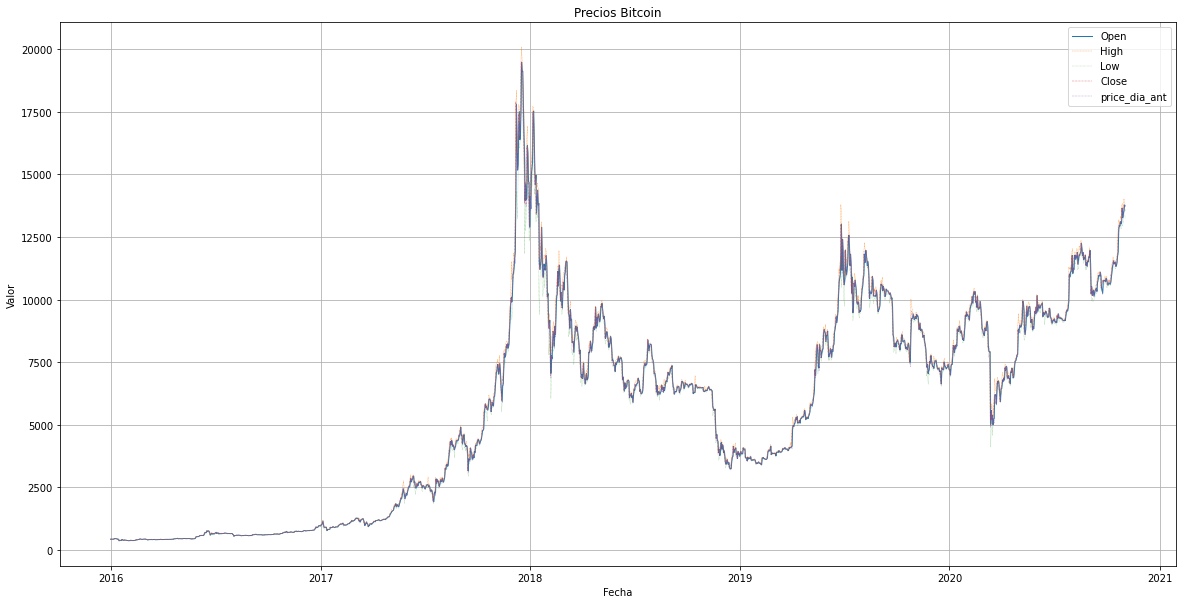

In [33]:
import matplotlib.pyplot as plt

BTC_I['Date']=BTC_I.index
BTC_I.head()

fig,ax= plt.subplots(figsize=(20,10))
ax.plot(BTC_I.Date, BTC_I.Open, label='Open',linewidth=1)
ax.plot(BTC_I.Date, BTC_I.High, label='High',linewidth=0.3,linestyle='--')
ax.plot(BTC_I.Date, BTC_I.Low, label='Low',linewidth=0.3,linestyle=':')
ax.plot(BTC_I.Date, BTC_I.Close, label='Close',linewidth=0.3,linestyle='dashdot')
ax.plot(BTC_I.Date, BTC_I.price_dia_ant, label='price_dia_ant',linewidth=0.3,linestyle='-.' )

ax.legend()
ax.grid()
ax.set_title('Precios Bitcoin')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.show()

Vamos a analizar con mayor profundidad el caso del precio de cierre y el precio del día anterior:

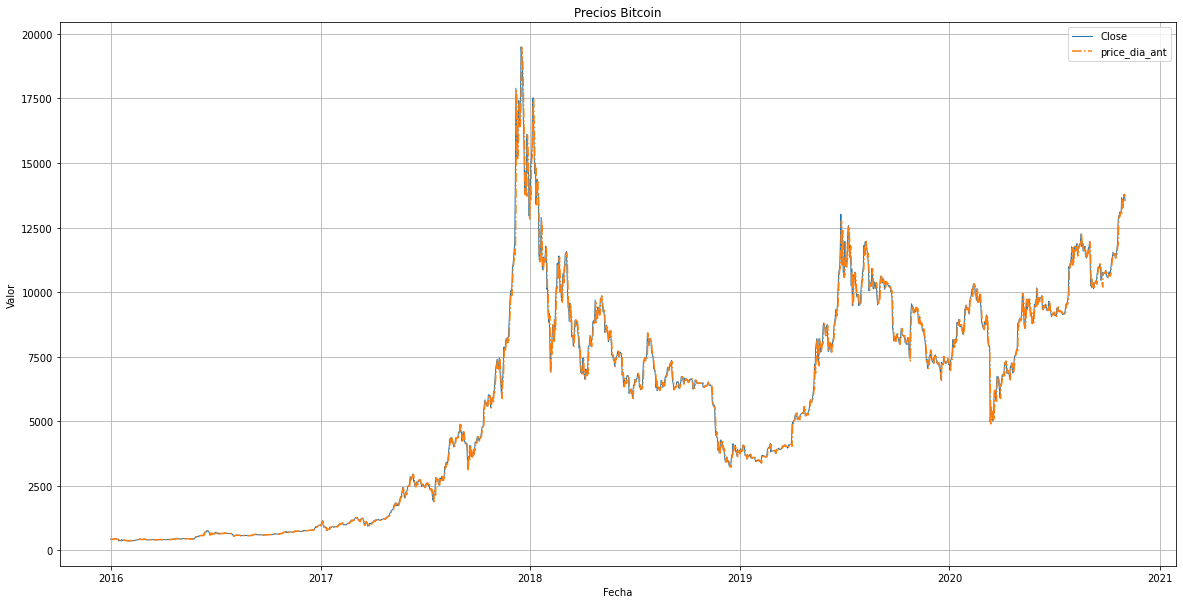

In [34]:
BTC_I['Date']=BTC_I.index
BTC_I.head()

fig,ax= plt.subplots(figsize=(20,10))
ax.plot(BTC_I.Date, BTC_I.Close, label='Close',linewidth=1,linestyle='-')
ax.plot(BTC_I.Date, BTC_I.price_dia_ant, label='price_dia_ant',linewidth=1.5,linestyle='-.' )

ax.legend()
ax.grid()
ax.set_title('Precios Bitcoin')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.show()

En general, no vemos una variación importante de un día al otro. Lo confirmaremos con el gráfico de variación:

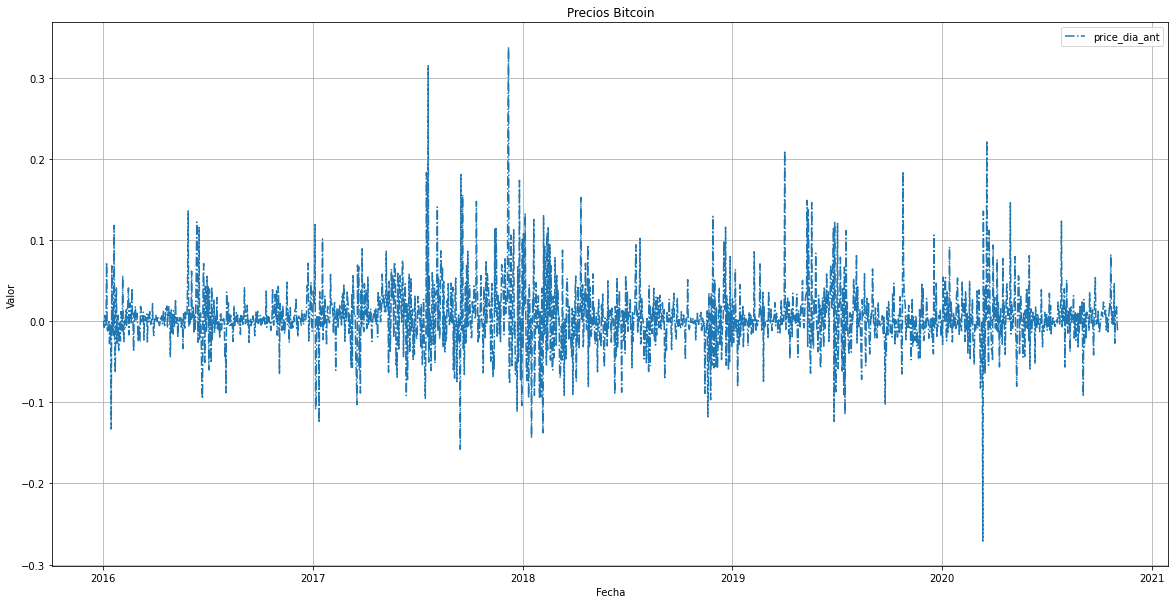

In [35]:
BTC_I['Date']=BTC_I.index
BTC_I.head()


fig,ax= plt.subplots(figsize=(20,10))
ax.plot(BTC_I.Date, BTC_I.variacion_precio, label='price_dia_ant',linewidth=1.5,linestyle='-.' )

ax.legend()
ax.grid()
ax.set_title('Precios Bitcoin')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.show()

En el gráfico de variación sí podemos observar algunas variaciones importantes de un día al otro en el año 2020 hacia mínimos, probablemente relacionado a los primeros meses de pandemia y luego máximos mostrando una recuperación y en 2017 mostrando el primer repunte en el valor de la cripto.

Analizaremos las correlaciones entre las distintas variables:

In [36]:
BTC_I.corr()

market_cap  price_dia_ant  variacion_precio      Open  \
market_cap          1.000000       0.994953          0.029225  0.994876   
price_dia_ant       0.994953       1.000000         -0.035308  0.999938   
variacion_precio    0.029225      -0.035308          1.000000 -0.034123   
Open                0.994876       0.999938         -0.034123  1.000000   
High                0.995585       0.998145          0.003429  0.998479   
Low                 0.997729       0.997796          0.001439  0.997543   
Close               0.997956       0.996787          0.032179  0.996862   
Adj Close           0.997956       0.996787          0.032179  0.996862   
Volume              0.688963       0.655138          0.024630  0.655403   

                      High       Low     Close  Adj Close    Volume  
market_cap        0.995585  0.997729  0.997956   0.997956  0.688963  
price_dia_ant     0.998145  0.997796  0.996787   0.996787  0.655138  
variacion_precio  0.003429  0.001439  0.032179   0.032179  0.024630  
Open              0.998479  0.997543  0.996862   0.996862  0.655403  
High              1.000000  0.996850  0.998607   0.998607  0.655018  
Low               0.996850  1.000000  0.998321   0.998321  0.658822  
Close             0.998607  0.998321  1.000000   1.000000  0.656629  
Adj Close         0.998607  0.998321  1.000000   1.000000  0.656629  
Volume            0.655018  0.658822  0.656629   0.656629  1.000000

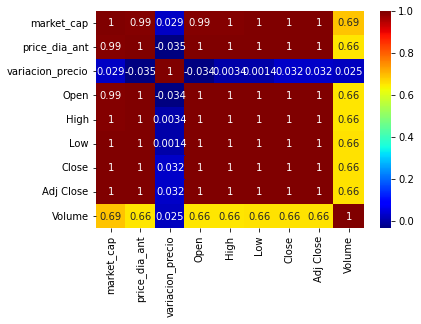

In [37]:
sns.heatmap(BTC_I.corr(),annot=True,cmap='jet')
plt.show()

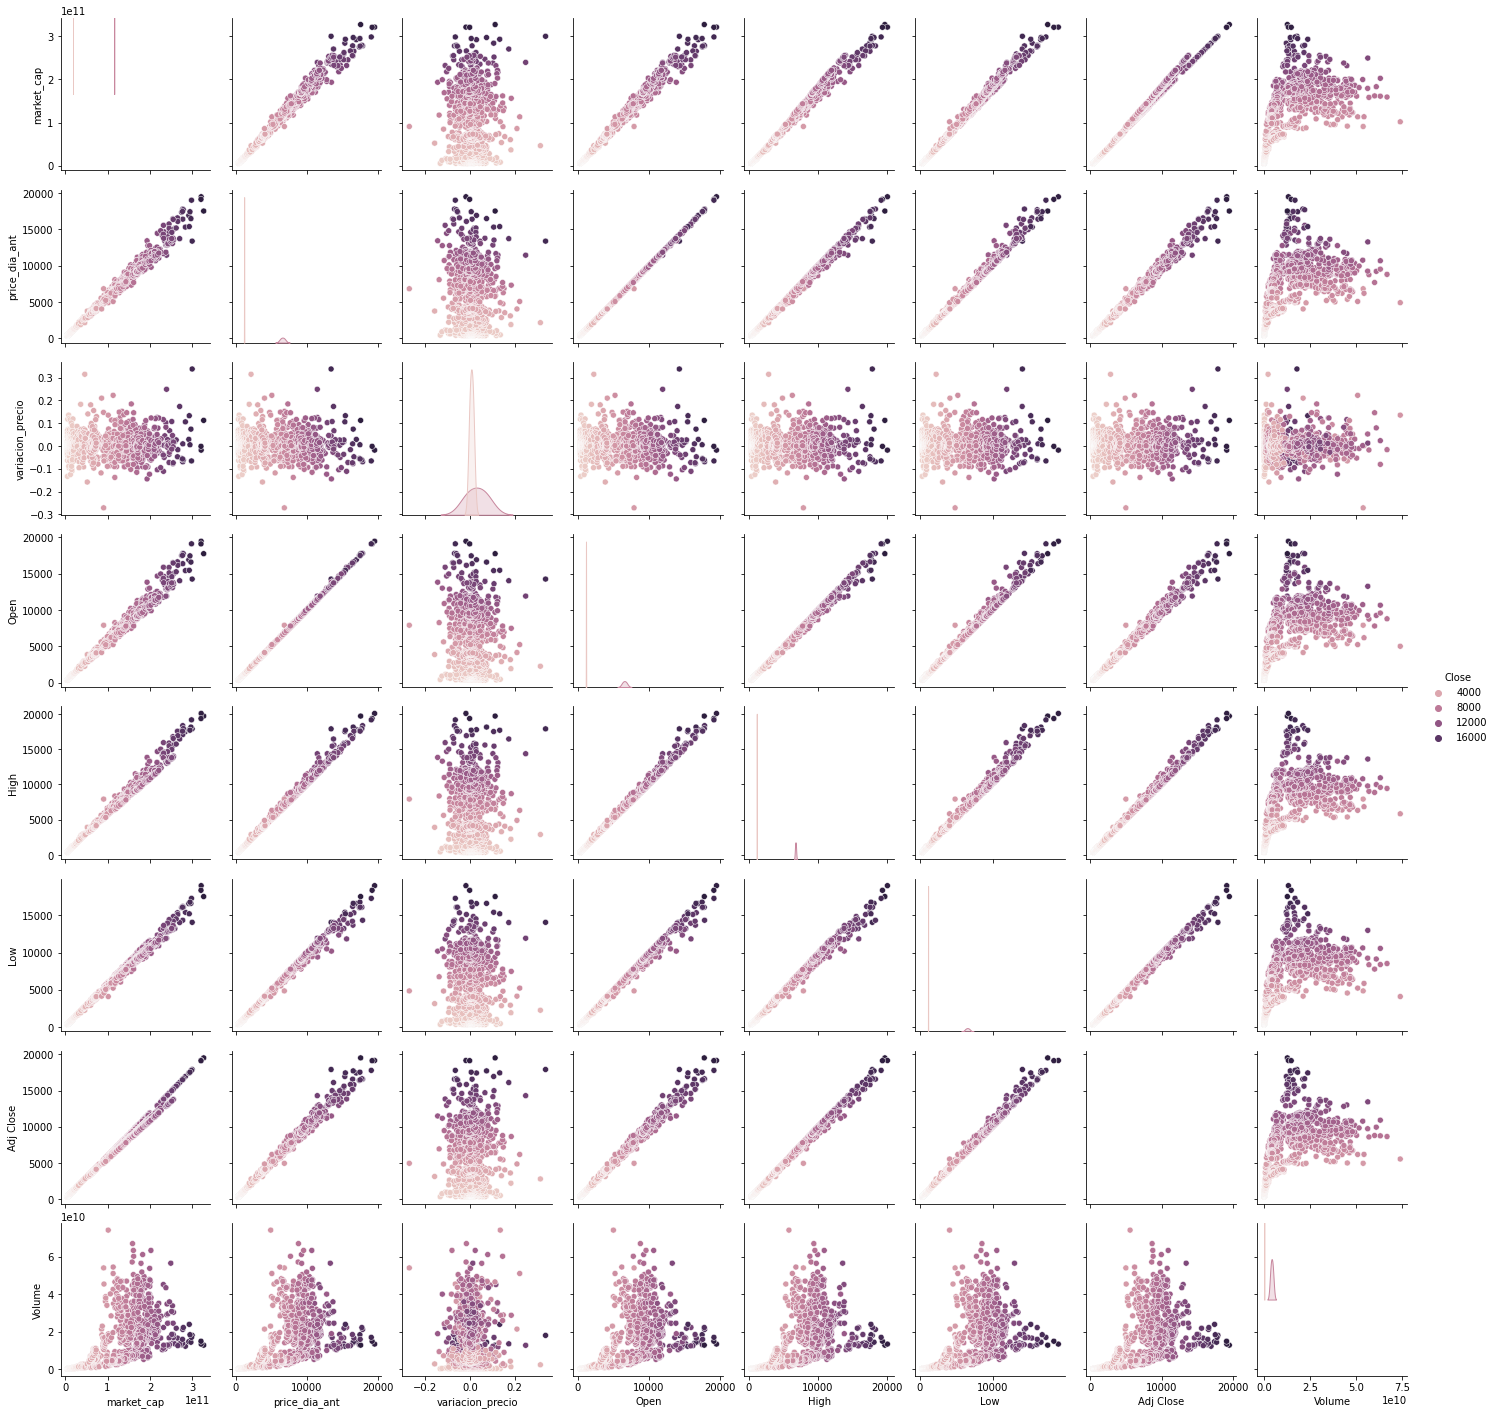

In [38]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from seaborn.relational import lineplot 

sns.pairplot(BTC_I,hue='Close')

En general, podemos observar que la variable que menos se correlaciona con todas es la variación en el precio. Luego el volumen, por lo cual probablemente la cantidad operada de la moneda no tiene una relación tan significativa con los precios operados. 

Por otro lado, analizaremos la desviación de cada uno de los precios, para encontrar algunas conclusiones en torno a su comportamiento:

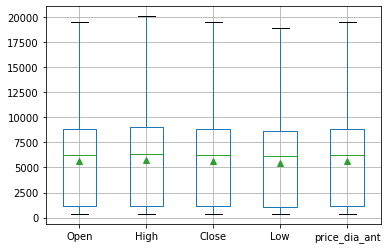

In [39]:
BTC_I.boxplot(showmeans=True, column=['Open','High','Close', 'Low','price_dia_ant'])

El comportamiento observado, confirma nuestra primera teoría: Los LS están muy por encima de la mediana, estableciendo la existencia de asimetrías positivas. Los datos se concentran en la parte inferior, en la parte superior están más dispersos. 

###¿Es el BTC una inversión de Corto o Largo Plazo?

A partir de lo observado podemos suponer que se trata de una inversión de Largo Plazo:

In [40]:
BTC_I_close=BTC_I[['Close']]
BTC_I_close.head()

Close
date_f                
2016-01-01  434.334015
2016-01-02  433.437988
2016-01-03  430.010986
2016-01-04  433.091003
2016-01-05  431.959991

In [41]:
BTC_I_close['Date_2']=BTC_I_close.index
BTC_I_close

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Close     Date_2
date_f                             
2016-01-01    434.334015 2016-01-01
2016-01-02    433.437988 2016-01-02
2016-01-03    430.010986 2016-01-03
2016-01-04    433.091003 2016-01-04
2016-01-05    431.959991 2016-01-05
...                  ...        ...
2020-10-29  13437.882812 2020-10-29
2020-10-30  13546.522461 2020-10-30
2020-10-31  13780.995117 2020-10-31
2020-11-01  13737.109375 2020-11-01
2020-11-02  13550.489258 2020-11-02

[1746 rows x 2 columns]

In [42]:
import plotly.graph_objects as go # importamos los objetos de plotly
import plotly.express as px

fig_BTC=px.line(data_frame=BTC_I_close, x='Date_2',y='Close',title='Precio BTC', 
                 labels={"Date_2":"Fecha", "Close":"Precio"})
fig_BTC.update_layout(paper_bgcolor="#FFFFFa",plot_bgcolor='#FFFFFa',)

fig_BTC.show()

Los mayores valores se observan en períodos largos de tiempo. Incluso sabiendo cómo se ha comportado BTC en períodos posteriores al analizado, hasta la fecha comprobamos que los valores máximos alcanzados fueron mayores al máximo que podemos observar en 2017 dado el dataset que nos limita obtener más información.


In [43]:
df_BTC_close=df_BTC[['Close','date_f']]
df_BTC_close

Close     date_f
Date                               
2016-01-01    434.334015 2016-01-01
2016-01-02    433.437988 2016-01-02
2016-01-03    430.010986 2016-01-03
2016-01-04    433.091003 2016-01-04
2016-01-05    431.959991 2016-01-05
...                  ...        ...
2022-09-25  18802.097656 2022-09-25
2022-09-26  19222.671875 2022-09-26
2022-09-27  19110.546875 2022-09-27
2022-09-28  19426.720703 2022-09-28
2022-09-29  19573.050781 2022-09-29

[2464 rows x 2 columns]

In [44]:
import plotly.graph_objects as go # importamos los objetos de plotly
import plotly.express as px

fig_BTC=px.line(data_frame=df_BTC_close, x='date_f',y='Close',title='Precio BTC', 
                 labels={"date_f":"Fecha", "Close":"Precio"})
fig_BTC.update_layout(paper_bgcolor="#FFFFFa",plot_bgcolor='#FFFFFa',)

fig_BTC.show()

Vemos como ampliando la serie, a través de los datos de la API, los valores máximos se dieron a finales de 2021.

###¿Podremos predecir el valor futuro?

Intentaremos hacer una aproximación a través del modelo ARIMA para series de tiempo:

Primero suavizaremos las fluctuaciones a corto plazo y expondremos las tendencias a largo plazo en los datos. Luego, intentaremos descomponer la serie de tiempo en su tendencia, su estacionalidad y sus factores residuales. 

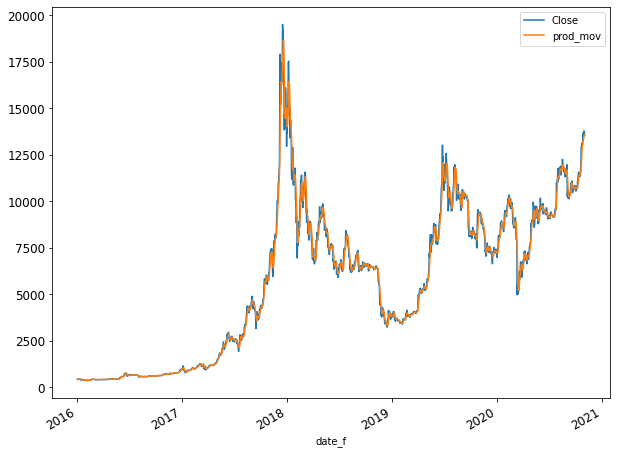

In [45]:

BTC_I_ma = BTC_I['Close'].rolling(window= 5).mean()
BTC_I['prod_mov'] = BTC_I_ma
plot = BTC_I[['Close', 'prod_mov']].plot(figsize=(10, 8), fontsize=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



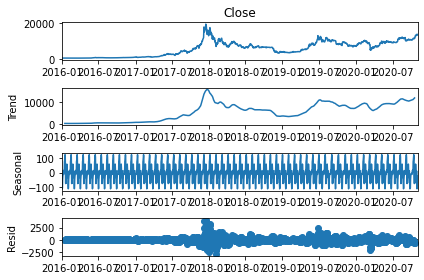

In [46]:
# Ejemplo de descomposición de serie de tiempo
import statsmodels.api as sm 
descomposicion = sm.tsa.seasonal_decompose(BTC_I['Close'],
                                                  model='additive', freq=30)  
fig = descomposicion.plot()

La serie de tiempo tiene un comportamiento aleatorio y las medidas móviles tampoco parecen ayudar a encontrar la estacionalidad. Intentaremos igualmente aplicar ARIMA. El modelo ARIMA aplica los conceptos  de regresión a las series de tiempo; Las variables independientes son valores del pasado. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



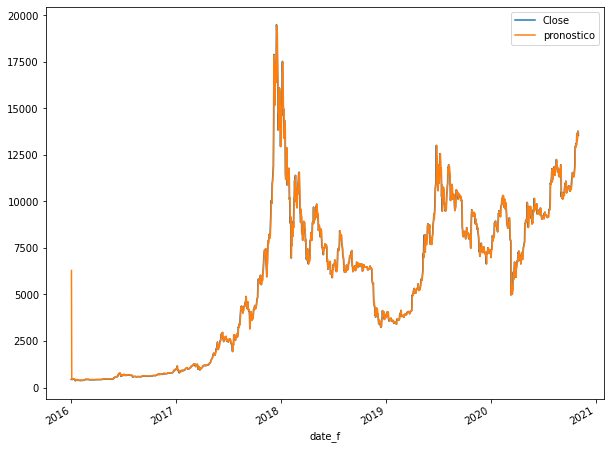

In [47]:
modelo = sm.tsa.ARIMA(BTC_I['Close'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
BTC_I['pronostico'] = resultados.fittedvalues  
plot = BTC_I[['Close', 'pronostico']].plot(figsize=(10, 8)) 

El modelo parece efectivo

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



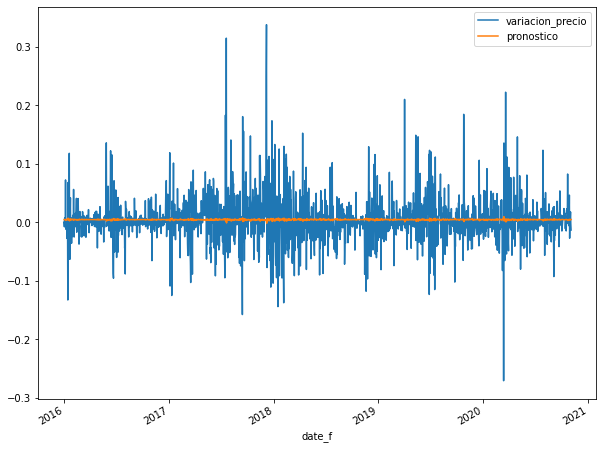

In [48]:
# ARIMA sobre variación diaria
modelo = sm.tsa.ARIMA(BTC_I['variacion_precio'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
BTC_I['pronostico'] = resultados.fittedvalues  
plot = BTC_I[['variacion_precio', 'pronostico']].plot(figsize=(10, 8)) 

El modelo predice variaciones muy pequeñas, por lo cual no sería útil. Deberemos probar otra prueba de regresión para establecer la correspondencia y poder efectuar pronósticos

In [49]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)
# var dep ~ vars indepen, + añade nuevas columnas
model1 = 'Close~Volume+market_cap+price_dia_ant+variacion_precio' 
# crea un modelo/regresión para las variables y se ajusta con .fit()
lm1 = smf.ols(formula = model1, data = BTC_I).fit()
# se presenta un resumen de los residuos del modelo
print(lm1.summary()) 
# OLS es ordinary least squares

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.340e+05
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:56:00   Log-Likelihood:                -10954.
No. Observations:                1746   AIC:                         2.192e+04
Df Residuals:                    1741   BIC:                         2.194e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.0334      5.402  

Variable dependiente es 'price_usd', usamos OLS conocidos como mínimos cuadrados ordinarios.

El número de observaciones es significativo. Df Residuals es otro nombre para nuestros Grados de Libertad en nuestro modo.

Df model es el número de nuestras variables de predicción (volume, market_cap,price_dia_ant,variacion_precio).

Nuestro tipo de covarianza aparece como no robusto. Una covarianza robusta es aquella que se calcula de manera que se minimicen o eliminen las variables, lo que no es el caso aquí.

R-squared es la medida de cuánto de la variable dependiente se explica por cambios en nuestras variables independientes. En términos porcentuales, 0,998 significaría que nuestro modelo explica el 99.8% del cambio en nuestra variable 'price_usd'.

El Adj R-squared penaliza la fórmula R-squared en función del número de variables, por lo tanto, una puntuación ajustada más baja puede indicarle que algunas variables no están contribuyendo correctamente al R-squared de su modelo.En nuestro caso esto no sucede ya que el valor es igual al 99,8%

Según este modelo, el precio del bitcoin tiene una relación positiva con el precio del día anterior, la variación del precio y market_cap pero negativa con el volumen.

A partir de nuestra fórmula Close~Volume+market_cap+price_dia_ant+variacion_precio , se muestra las variables independientes, en nuestro caso son: Volume, market_cap, price_dia_ant, variacion_precio.

El std err es una estimación de la desviación estándar del coeficiente, una medida de la cantidad de variación en el coeficiente a lo largo de sus puntos de datos.

La t está relacionada y es una medida de la precisión con la que se midió el coeficiente, estás se calculan asumiendo la siguiente hipótesis

H0 : La variable X no influye en Y HA : X tiene un impacto significativo en Y

En teoría, leemos que el valores-p es la probabilidad de obtener el estadístico t para rechazar con H0 En la tabla de resumen, podemos ver que el valor-p para ambos parámetros es igual a 0. Esto no es exactamente 0, pero como tenemos estadísticos t muy grandes el valor p será aproximadamente 0.

Otra forma de probar la hipotesis, es incluir el enfoque de intervalos de confianza, esto nos dice que la estimación del parámetro corresponiente tiene el 95% de estar entre las cotas marcadas.

Ninguna de las variables tiene un pvalue no significativo, por lo cual pueden mantenerse todas en el modelo.

Control de Underflight u Overflights
Es probable que nuestri modelo al tener un valor R cuadrado del 98% esté sobreajustado, por eso deberemos realizar el test para poder comprobarlo:

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets 
from sklearn.model_selection import train_test_split # para dividir el dataset
from sklearn.linear_model import LinearRegression # para hacer una regresión lineal
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error # metricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

BTC_I_x = BTC_I[['Volume','market_cap','price_dia_ant','variacion_precio']]
BTC_I_y = BTC_I['Close']

sns.set_style('whitegrid')
# dividimos el dataset
X_train,X_test,y_train,y_test = train_test_split(BTC_I_x,BTC_I_y,test_size=0.2,random_state=2) 

# instanciamos el modelo
lr = LinearRegression()

# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)

# hacemos una predeción con datos nuevos de X_test
y_pred = lr.predict(X_test)

In [51]:
# Calculamos el MAE
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 83.3840486273953


In [52]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 18651.5104236187


Este valor es bastante alejado de cero, por lo cual sería necesario seguir evaluando el modelo

In [53]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 136.57053277928844


Será necesario establecer otro modelo para luego comparar los RMSE y determinar si alguno resulta más robusto que otro (y no sólo quedarnos con la conclusión del valor del MSE) 

In [54]:
print("r2", r2_score(y_test,y_pred))

r2 0.9989143523622805


Este valor que habíamos obtenido, nos indica que el modelo es robusto, pero es necesario hacer más pruebas para comprobar si esto es cierto

In [55]:
y_pred=lr.predict(X_test)

##ETH

In [56]:
df_cr_reg_eth=df_cr_r.query("ticker=='ETH'")
df_cr_reg_eth.head(8000)

volume   price_usd    market_cap ticker     date_f  \
1746  2.060620e+05    0.948024  7.198039e+07    ETH 2016-01-01   
1747  2.555040e+05    0.937124  7.117666e+07    ETH 2016-01-02   
1748  4.076320e+05    0.971905  7.384329e+07    ETH 2016-01-03   
1749  3.462450e+05    0.954480  7.254371e+07    ETH 2016-01-04   
1750  2.198330e+05    0.950176  7.224097e+07    ETH 2016-01-05   
...            ...         ...           ...    ...        ...   
3487  1.292048e+10  386.730000  4.378225e+10    ETH 2020-10-29   
3488  1.368806e+10  382.820000  4.334468e+10    ETH 2020-10-30   
3489  1.127696e+10  386.590000  4.377683e+10    ETH 2020-10-31   
3490  1.047515e+10  396.360000  4.488831e+10    ETH 2020-11-01   
3491  1.399757e+10  383.160000  4.339838e+10    ETH 2020-11-02   

      USD_price_change_1_day  price_dia_ant  variacion_precio  
1746                0.000000       0.948024          0.000000  
1747               -0.011498       0.947899         -0.011367  
1748                0.037115       0.935833          0.038545  
1749               -0.017929       0.971593         -0.017613  
1750               -0.004509       0.954461         -0.004489  
...                      ...            ...               ...  
3487               -0.004940     388.640515         -0.004916  
3488               -0.010110     386.690468         -0.010009  
3489                0.009848     382.782873          0.009946  
3490                0.025272     386.343090          0.025927  
3491               -0.033303     395.920400         -0.032230  

[1746 rows x 8 columns]

In [57]:
df_cr_reg_eth=df_cr_reg_eth[['date_f','volume','price_usd','market_cap','price_dia_ant','variacion_precio']]
df_cr_reg_eth= df_cr_reg_eth.set_index('date_f')
df_cr_reg_eth.sort_index(inplace=True)
df_cr_reg_eth.head()

volume  price_usd  market_cap  price_dia_ant  variacion_precio
date_f                                                                      
2016-01-01  206062.0   0.948024  71980386.0       0.948024          0.000000
2016-01-02  255504.0   0.937124  71176658.0       0.947899         -0.011367
2016-01-03  407632.0   0.971905  73843292.0       0.935833          0.038545
2016-01-04  346245.0   0.954480  72543707.0       0.971593         -0.017613
2016-01-05  219833.0   0.950176  72240974.0       0.954461         -0.004489

In [58]:
yf.pdr_override() 
df_ETH = pdr.get_data_yahoo("ETH-USD", start="2016-01-01", end="2022-09-30")

[*********************100%***********************]  1 of 1 completed


In [59]:
df_ETH.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

                Volume  
Date                    
2017-11-09   893249984  
2017-11-10   885985984  
2017-11-11   842300992  
2017-11-12  1613479936  
2017-11-13  1041889984

In [60]:
df_ETH.duplicated()

Date
2017-11-09    False
2017-11-10    False
2017-11-11    False
2017-11-12    False
2017-11-13    False
              ...  
2022-09-25    False
2022-09-26    False
2022-09-27    False
2022-09-28    False
2022-09-29    False
Length: 1786, dtype: bool

In [61]:
df_ETH.duplicated().sum().sum()

0

In [62]:
df_ETH.isnull()

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2017-11-09  False  False  False  False      False   False
2017-11-10  False  False  False  False      False   False
2017-11-11  False  False  False  False      False   False
2017-11-12  False  False  False  False      False   False
2017-11-13  False  False  False  False      False   False
...           ...    ...    ...    ...        ...     ...
2022-09-25  False  False  False  False      False   False
2022-09-26  False  False  False  False      False   False
2022-09-27  False  False  False  False      False   False
2022-09-28  False  False  False  False      False   False
2022-09-29  False  False  False  False      False   False

[1786 rows x 6 columns]

In [63]:
df_ETH.isnull().sum().sum()

0

In [64]:
df_ETH.isnull().sum(axis=1)

Date
2017-11-09    0
2017-11-10    0
2017-11-11    0
2017-11-12    0
2017-11-13    0
             ..
2022-09-25    0
2022-09-26    0
2022-09-27    0
2022-09-28    0
2022-09-29    0
Length: 1786, dtype: int64

In [65]:
df_ETH.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1786 entries, 2017-11-09 to 2022-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1786 non-null   float64
 1   High       1786 non-null   float64
 2   Low        1786 non-null   float64
 3   Close      1786 non-null   float64
 4   Adj Close  1786 non-null   float64
 5   Volume     1786 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 97.7 KB


In [66]:
df_ETH['date_f']=df_ETH.index

In [67]:
df_ETH.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

                Volume     date_f  
Date                               
2017-11-09   893249984 2017-11-09  
2017-11-10   885985984 2017-11-10  
2017-11-11   842300992 2017-11-11  
2017-11-12  1613479936 2017-11-12  
2017-11-13  1041889984 2017-11-13

####Uniendo API y Data Set

In [68]:
ETH=pd.merge(df_cr_reg_eth, df_ETH, how='inner', on='date_f')[['date_f','market_cap','price_dia_ant','variacion_precio','Open','High','Low','Close','Adj Close','Volume']]
ETH

date_f    market_cap  price_dia_ant  variacion_precio        Open  \
0    2017-11-09  3.068558e+10     308.618723          0.039730  308.644989   
1    2017-11-10  2.862319e+10     319.421957         -0.063151  320.670990   
2    2017-11-11  3.010529e+10     298.454395          0.054365  298.585999   
3    2017-11-12  2.946354e+10     314.534351         -0.021061  314.690002   
4    2017-11-13  3.031283e+10     307.657926          0.029455  307.024994   
...         ...           ...            ...               ...         ...   
1063 2020-10-29  4.378225e+10     388.640515         -0.004916  388.651062   
1064 2020-10-30  4.334468e+10     386.690468         -0.010009  386.730255   
1065 2020-10-31  4.377683e+10     382.782873          0.009946  382.820038   
1066 2020-11-01  4.488831e+10     386.343090          0.025927  386.590332   
1067 2020-11-02  4.339838e+10     395.920400         -0.032230  396.355988   

            High         Low       Close   Adj Close       Volume  
0     329.451996  307.056000  320.884003  320.884003    893249984  
1     324.717987  294.541992  299.252991  299.252991    885985984  
2     319.453003  298.191986  314.681000  314.681000    842300992  
3     319.153015  298.513000  307.907990  307.907990   1613479936  
4     328.415009  307.024994  316.716003  316.716003   1041889984  
...          ...         ...         ...         ...          ...  
1063  393.227692  381.288757  386.730103  386.730103  12920477749  
1064  391.464722  375.092407  382.819977  382.819977  13688056970  
1065  393.010132  381.295258  386.590332  386.590332  11276963426  
1066  397.116119  385.165527  396.358185  396.358185  10475146018  
1067  403.240753  381.017639  383.156738  383.156738  13997574252  

[1068 rows x 10 columns]

In [69]:
ETH_I=ETH.set_index('date_f')
ETH_I

market_cap  price_dia_ant  variacion_precio        Open  \
date_f                                                                  
2017-11-09  3.068558e+10     308.618723          0.039730  308.644989   
2017-11-10  2.862319e+10     319.421957         -0.063151  320.670990   
2017-11-11  3.010529e+10     298.454395          0.054365  298.585999   
2017-11-12  2.946354e+10     314.534351         -0.021061  314.690002   
2017-11-13  3.031283e+10     307.657926          0.029455  307.024994   
...                  ...            ...               ...         ...   
2020-10-29  4.378225e+10     388.640515         -0.004916  388.651062   
2020-10-30  4.334468e+10     386.690468         -0.010009  386.730255   
2020-10-31  4.377683e+10     382.782873          0.009946  382.820038   
2020-11-01  4.488831e+10     386.343090          0.025927  386.590332   
2020-11-02  4.339838e+10     395.920400         -0.032230  396.355988   

                  High         Low       Close   Adj Close       Volume  
date_f                                                                   
2017-11-09  329.451996  307.056000  320.884003  320.884003    893249984  
2017-11-10  324.717987  294.541992  299.252991  299.252991    885985984  
2017-11-11  319.453003  298.191986  314.681000  314.681000    842300992  
2017-11-12  319.153015  298.513000  307.907990  307.907990   1613479936  
2017-11-13  328.415009  307.024994  316.716003  316.716003   1041889984  
...                ...         ...         ...         ...          ...  
2020-10-29  393.227692  381.288757  386.730103  386.730103  12920477749  
2020-10-30  391.464722  375.092407  382.819977  382.819977  13688056970  
2020-10-31  393.010132  381.295258  386.590332  386.590332  11276963426  
2020-11-01  397.116119  385.165527  396.358185  396.358185  10475146018  
2020-11-02  403.240753  381.017639  383.156738  383.156738  13997574252  

[1068 rows x 9 columns]

In [70]:
ETH_I.describe()

market_cap  price_dia_ant  variacion_precio         Open  \
count  1.068000e+03    1068.000000       1068.000000  1068.000000   
mean   3.331840e+10     322.138762          0.004030   323.193410   
std    2.235874e+10     231.679820          0.051727   232.992949   
min    8.751210e+09      84.117414         -0.297487    84.279694   
25%    1.829431e+10     170.189357         -0.020342   170.754616   
50%    2.474152e+10     228.181951          0.000465   228.438065   
75%    4.360740e+10     397.896542          0.025103   399.462433   
max    1.354007e+11    1395.790445          0.359747  1397.479980   

              High          Low        Close    Adj Close        Volume  
count  1068.000000  1068.000000  1068.000000  1068.000000  1.068000e+03  
mean    334.097430   310.771225   323.152113   323.152113  7.058670e+09  
std     244.622868   218.998530   232.852627   232.852627  5.739017e+09  
min      85.342743    82.829887    84.308296    84.308296  6.217330e+08  
25%     175.063793   166.606400   170.800346   170.800346  2.168670e+09  
50%     232.783852   222.878845   228.536285   228.536285  5.956378e+09  
75%     413.922005   386.524139   398.874870   398.874870  1.005641e+10  
max    1432.880005  1290.599976  1396.420044  1396.420044  2.988005e+10

En primera instancia, podemos observar que los precios promedio de apertura, cierre, máximos, mínimos se mantienen en el umbral de 310 a 334 con desviaciones estándar que rondan los 230. Al ser menor la desviación que la media, podríamos establecer en principio que los datos no tienen tanta "dispersión" en torno a la media. 

Todo el análisis de estas variables nos permitirá establecer qué tan robustos pueden ser los datos con los que contemos para establecer predicciones futuras.

Por otro lado observamos que los máximos y mínimos se encuentran bastante alejadosde los límites superiores e inferiores, sobre todo los máximos, rondando en valores cercanos a 1.400 cuando los LS rondan valores de 390, lo cual nos haría pensar que en todo el período analizado, puede que no hayan existido grandes desviaciones, pero cuando las hubieron fueron más por encima de la media que por debajo

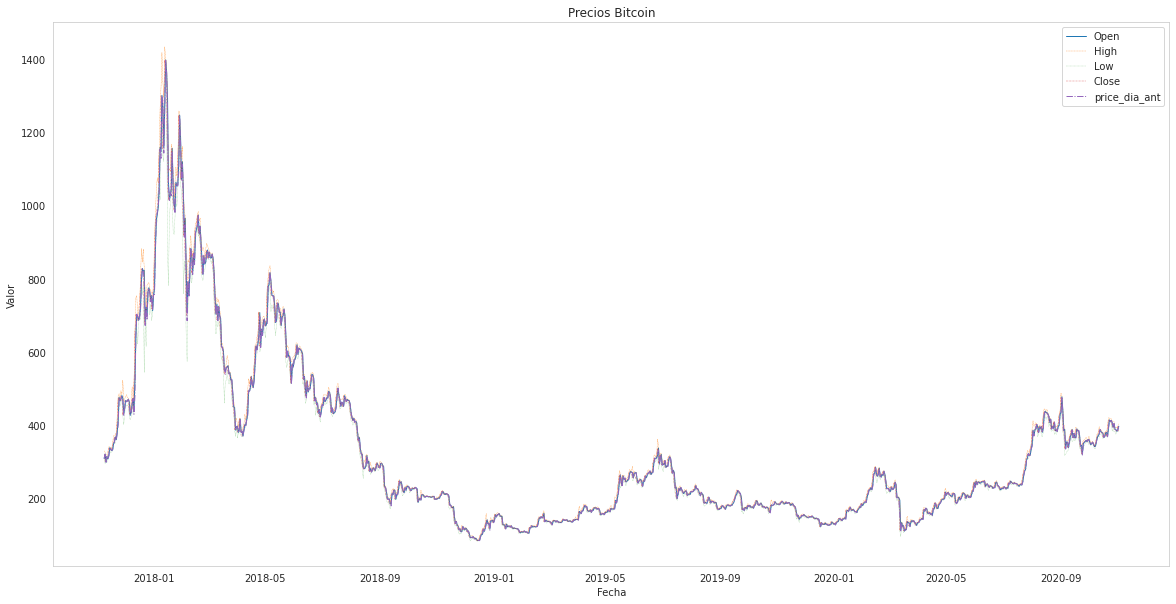

In [71]:
import matplotlib.pyplot as plt

ETH_I['Date']=ETH_I.index
ETH_I.head()

fig,ax= plt.subplots(figsize=(20,10))
ax.plot(ETH_I.Date, ETH_I.Open, label='Open',linewidth=1)
ax.plot(ETH_I.Date, ETH_I.High, label='High',linewidth=0.3,linestyle='--')
ax.plot(ETH_I.Date, ETH_I.Low, label='Low',linewidth=0.3,linestyle=':')
ax.plot(ETH_I.Date, ETH_I.Close, label='Close',linewidth=0.3,linestyle='dashdot')
ax.plot(ETH_I.Date, ETH_I.price_dia_ant, label='price_dia_ant',linewidth=1,linestyle='-.' )

ax.legend()
ax.grid()
ax.set_title('Precios Bitcoin')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.show()

Vamos a analizar con mayor profundidad el caso del precio de cierre y el precio del día anterior:

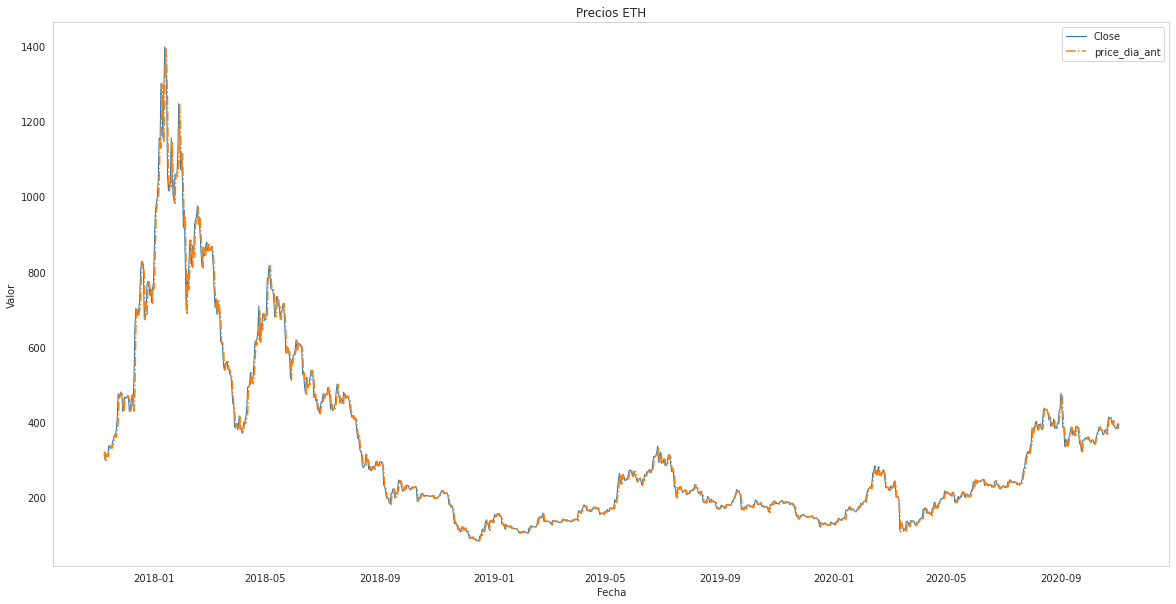

In [72]:
ETH_I['Date']=ETH_I.index
ETH_I.head()

fig,ax= plt.subplots(figsize=(20,10))
ax.plot(ETH_I.Date, ETH_I.Close, label='Close',linewidth=1,linestyle='-')
ax.plot(ETH_I.Date, ETH_I.price_dia_ant, label='price_dia_ant',linewidth=1.5,linestyle='-.' )

ax.legend()
ax.grid()
ax.set_title('Precios ETH')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.show()

En general, no vemos una variación importante de un día al otro. Lo confirmaremos con el gráfico de variación:

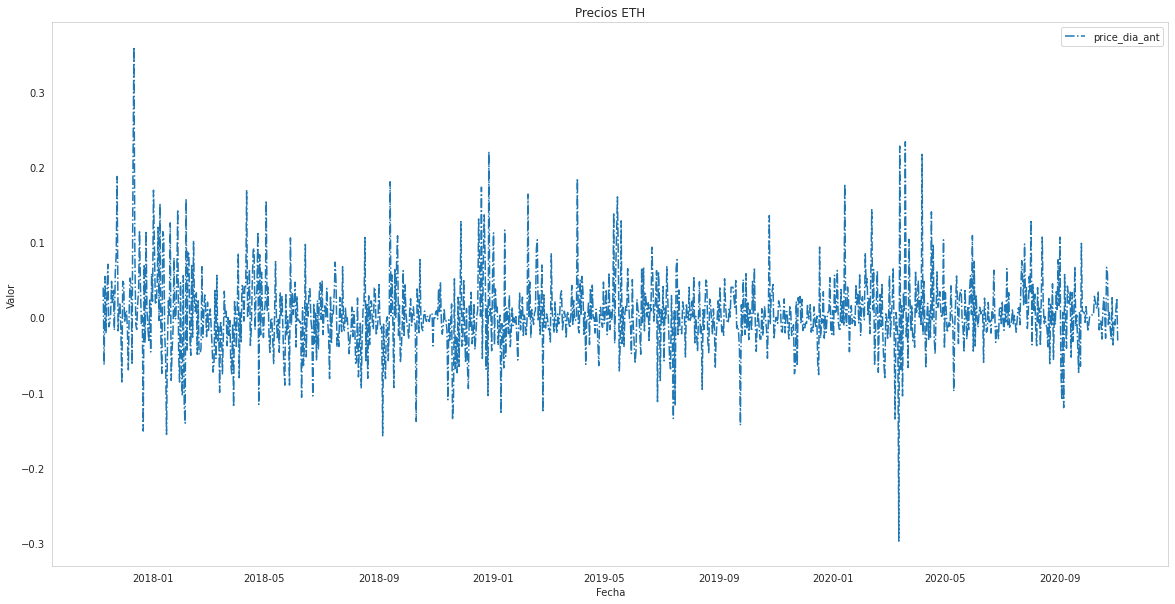

In [73]:
ETH_I['Date']=ETH_I.index
ETH_I.head()

fig,ax= plt.subplots(figsize=(20,10))
ax.plot(ETH_I.Date, ETH_I.variacion_precio, label='price_dia_ant',linewidth=1.5,linestyle='-.' )

ax.legend()
ax.grid()
ax.set_title('Precios ETH')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.show()

En el gráfico de variación sí podemos observar algunas variaciones importantes de un día al otro en el año 2020 hacia mínimos, probablemente relacionado a los primeros meses de pandemia  y en inicios de 2018 mostrando el primer repunte en el valor de la cripto.

Analizaremos las correlaciones entre las distintas variables:

In [74]:
ETH_I.corr()

market_cap  price_dia_ant  variacion_precio      Open  \
market_cap          1.000000       0.992321          0.059526  0.992191   
price_dia_ant       0.992321       1.000000         -0.023670  0.999908   
variacion_precio    0.059526      -0.023670          1.000000 -0.022983   
Open                0.992191       0.999908         -0.022983  1.000000   
High                0.994745       0.997590          0.019127  0.997951   
Low                 0.995441       0.995222          0.025717  0.994619   
Close               0.997712       0.994583          0.058690  0.994560   
Adj Close           0.997712       0.994583          0.058690  0.994560   
Volume             -0.195955      -0.239889          0.053039 -0.238742   

                      High       Low     Close  Adj Close    Volume  
market_cap        0.994745  0.995441  0.997712   0.997712 -0.195955  
price_dia_ant     0.997590  0.995222  0.994583   0.994583 -0.239889  
variacion_precio  0.019127  0.025717  0.058690   0.058690  0.053039  
Open              0.997951  0.994619  0.994560   0.994560 -0.238742  
High              1.000000  0.994927  0.997627   0.997627 -0.232842  
Low               0.994927  1.000000  0.997061   0.997061 -0.245654  
Close             0.997627  0.997061  1.000000   1.000000 -0.237580  
Adj Close         0.997627  0.997061  1.000000   1.000000 -0.237580  
Volume           -0.232842 -0.245654 -0.237580  -0.237580  1.000000

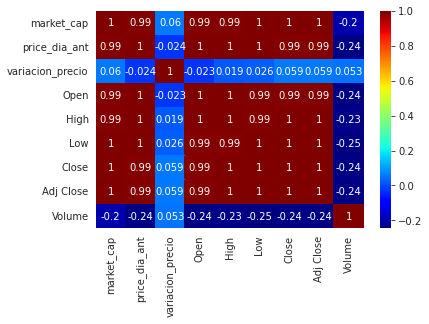

In [75]:
sns.heatmap(ETH_I.corr(),annot=True,cmap='jet')
plt.show()

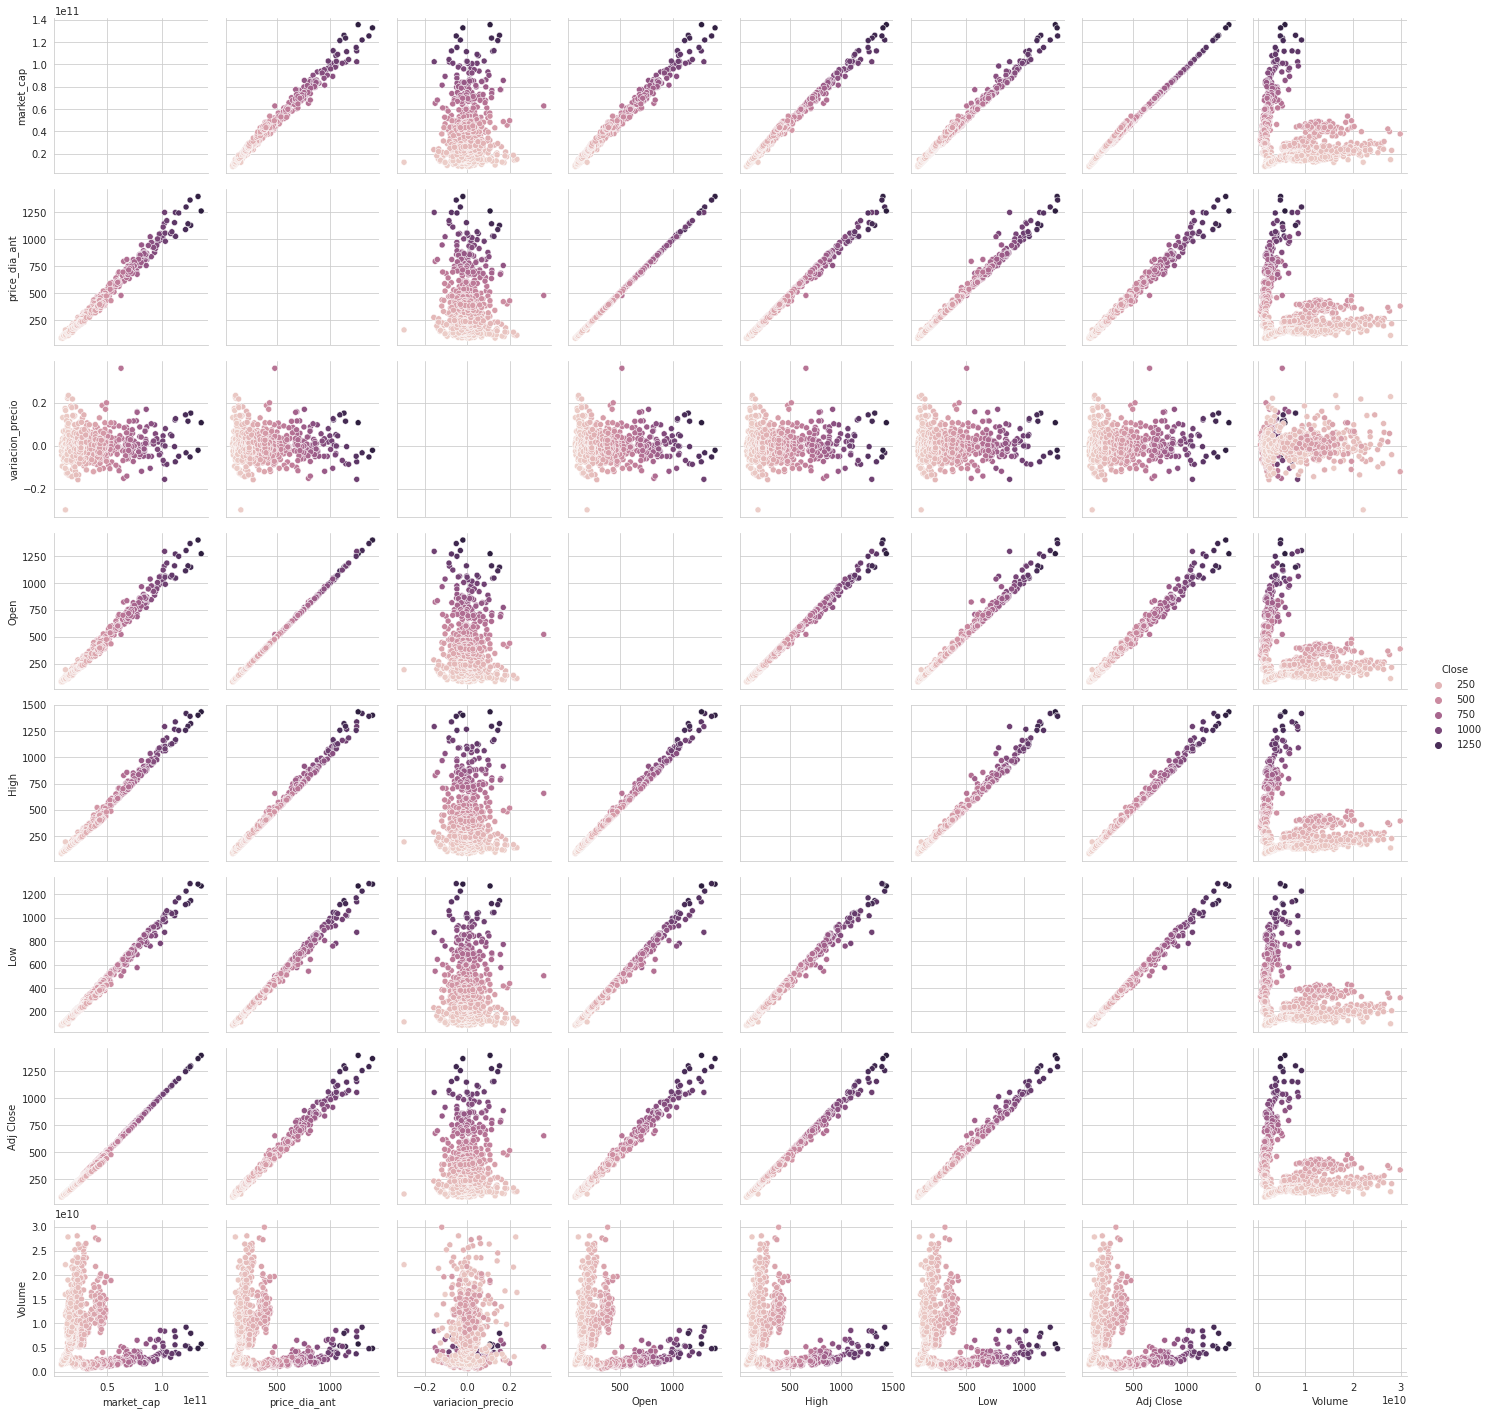

In [76]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from seaborn.relational import lineplot 

sns.pairplot(ETH_I,hue='Close')

En general, podemos observar que la variable que menos se correlaciona con todas es la variación en el precio. Luego el volumen, por lo cual probablemente la cantidad operada de la moneda no tiene una relación tan significativa con los precios operados. 

Por otro lado, analizaremos la desviación de cada uno de los precios, para encontrar algunas conclusiones en torno a su comportamiento:

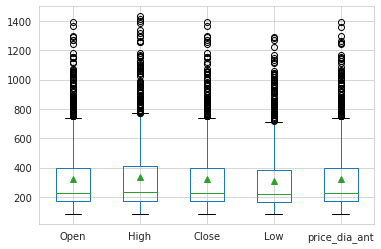

In [77]:
ETH_I.boxplot(showmeans=True, column=['Open','High','Close', 'Low','price_dia_ant'])

El comportamiento observado, confirma nuestra primera teoría: Los LS están por encima de la mediana, estableciendo la existencia de asimetrías positivas. Los datos se concentran en la parte inferior, en la parte superior están más dispersos. Los atípicos se presentan por encima del LS.

###¿Es el ETH una inversión de Corto o Largo Plazo?

A partir de lo observado podemos suponer que se trata de una inversión de Largo Plazo:

In [78]:
ETH_I_close=ETH_I[['Close']]
ETH_I_close.head()

Close
date_f                
2017-11-09  320.884003
2017-11-10  299.252991
2017-11-11  314.681000
2017-11-12  307.907990
2017-11-13  316.716003

In [79]:
ETH_I_close['Date_2']=ETH_I_close.index
ETH_I_close

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Close     Date_2
date_f                           
2017-11-09  320.884003 2017-11-09
2017-11-10  299.252991 2017-11-10
2017-11-11  314.681000 2017-11-11
2017-11-12  307.907990 2017-11-12
2017-11-13  316.716003 2017-11-13
...                ...        ...
2020-10-29  386.730103 2020-10-29
2020-10-30  382.819977 2020-10-30
2020-10-31  386.590332 2020-10-31
2020-11-01  396.358185 2020-11-01
2020-11-02  383.156738 2020-11-02

[1068 rows x 2 columns]

In [80]:
import plotly.graph_objects as go # importamos los objetos de plotly
import plotly.express as px

fig_ETH=px.line(data_frame=ETH_I_close, x='Date_2',y='Close',title='Precio ETH', 
                 labels={"Date_2":"Fecha", "Close":"Precio"})
fig_ETH.update_layout(paper_bgcolor="#FFFFFa",plot_bgcolor='#FFFFFa',)

fig_ETH.show()

Los mayores valores se observan en períodos largos de tiempo. Incluso sabiendo cómo se ha comportado BTC en períodos posteriores al analizado, hasta la fecha comprobamos que los valores máximos alcanzados fueron mayores al máximo que podemos observar en 2017 dado el dataset que nos limita obtener más información.


In [81]:
df_ETH_close=df_ETH[['Close','date_f']]
df_ETH_close

Close     date_f
Date                              
2017-11-09   320.884003 2017-11-09
2017-11-10   299.252991 2017-11-10
2017-11-11   314.681000 2017-11-11
2017-11-12   307.907990 2017-11-12
2017-11-13   316.716003 2017-11-13
...                 ...        ...
2022-09-25  1294.216797 2022-09-25
2022-09-26  1335.320190 2022-09-26
2022-09-27  1330.127686 2022-09-27
2022-09-28  1337.410889 2022-09-28
2022-09-29  1335.652344 2022-09-29

[1786 rows x 2 columns]

In [82]:
import plotly.graph_objects as go # importamos los objetos de plotly
import plotly.express as px

fig_ETH=px.line(data_frame=df_ETH_close, x='date_f',y='Close',title='Precio ETH', 
                 labels={"date_f":"Fecha", "Close":"Precio"})
fig_ETH.update_layout(paper_bgcolor="#FFFFFa",plot_bgcolor='#FFFFFa',)

fig_ETH.show()

Vemos como ampliando la serie, a través de los datos de la API, los valores máximos se dieron a finales de 2021.

###¿Podremos predecir el valor futuro?

Intentaremos hacer una aproximación a través del modelo ARIMA para series de tiempo:

Primero suavizaremos las fluctuaciones a corto plazo y expondremos las tendencias a largo plazo en los datos. Luego, intentaremos descomponer la serie de tiempo en su tendencia, su estacionalidad y sus factores residuales. 

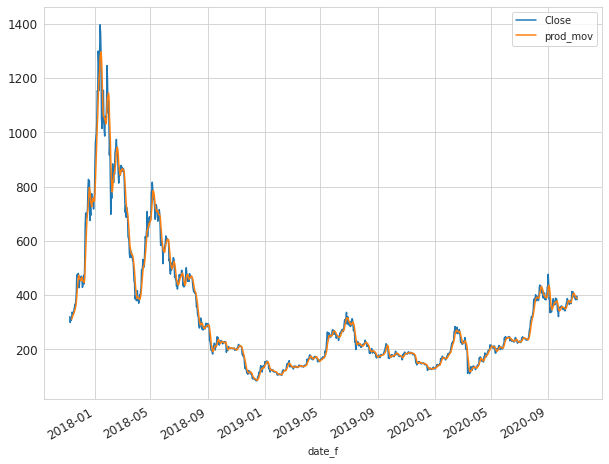

In [83]:

ETH_I_ma = ETH_I['Close'].rolling(window= 5).mean()
ETH_I['prod_mov'] = ETH_I_ma
plot = ETH_I[['Close', 'prod_mov']].plot(figsize=(10, 8), fontsize=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



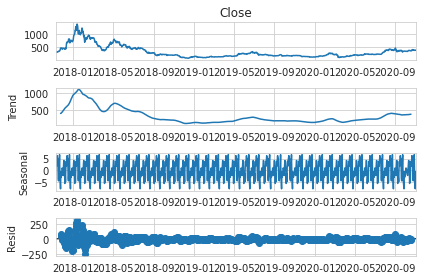

In [84]:
# Ejemplo de descomposición de serie de tiempo
import statsmodels.api as sm 
descomposicion = sm.tsa.seasonal_decompose(ETH_I['Close'],
                                                  model='additive', freq=30)  
fig = descomposicion.plot()

La serie de tiempo tiene un comportamiento aleatorio y las medidas móviles tampoco parecen ayudar a encontrar la estacionalidad. Intentaremos igualmente aplicar ARIMA. El modelo ARIMA aplica los conceptos  de regresión a las series de tiempo; Las variables independientes son valores del pasado. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



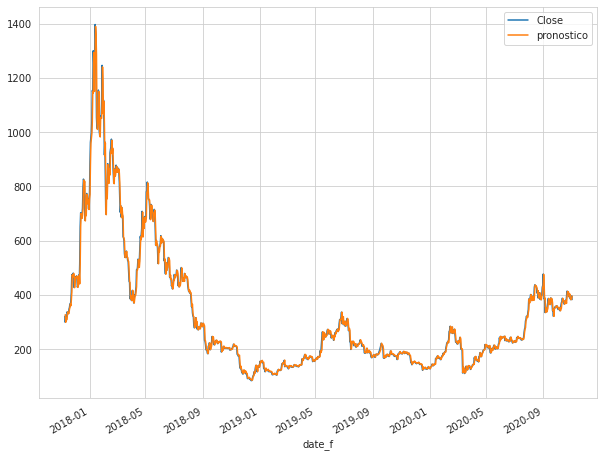

In [85]:
modelo = sm.tsa.ARIMA(ETH_I['Close'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
ETH_I['pronostico'] = resultados.fittedvalues  
plot = ETH_I[['Close', 'pronostico']].plot(figsize=(10, 8)) 

El modelo parece efectivo

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



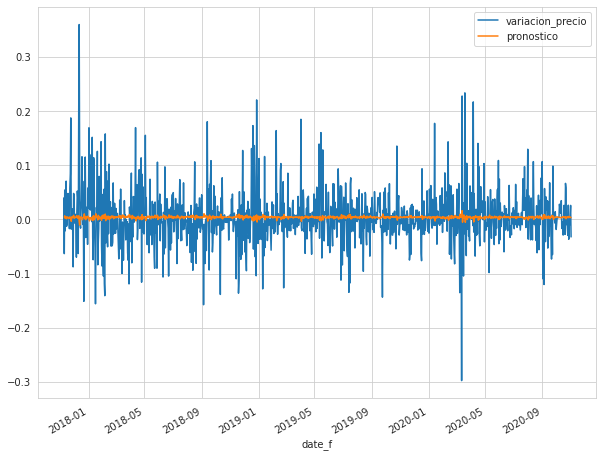

In [86]:
# ARIMA sobre variación diaria
modelo = sm.tsa.ARIMA(ETH_I['variacion_precio'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
ETH_I['pronostico'] = resultados.fittedvalues  
plot = ETH_I[['variacion_precio', 'pronostico']].plot(figsize=(10, 8)) 

El modelo predice variaciones muy pequeñas, por lo cual no sería útil. Deberemos probar otra prueba de regresión para establecer la correspondencia y poder efectuar pronósticos

In [87]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)
# var dep ~ vars indepen, + añade nuevas columnas
model1 = 'Close~Volume+market_cap+price_dia_ant+variacion_precio' 
# crea un modelo/regresión para las variables y se ajusta con .fit()
lm1 = smf.ols(formula = model1, data = ETH_I).fit()
# se presenta un resumen de los residuos del modelo
print(lm1.summary()) 
# OLS es ordinary least squares

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.625e+05
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:57:07   Log-Likelihood:                -3909.1
No. Observations:                1068   AIC:                             7828.
Df Residuals:                    1063   BIC:                             7853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.0990      0.691  

Variable dependiente es 'price_usd', usamos OLS conocidos como mínimos cuadrados ordinarios.

El número de observaciones es significativo. Df Residuals es otro nombre para nuestros Grados de Libertad en nuestro modo.

Df model es el número de nuestras variables de predicción (volume, market_cap,price_dia_ant,variacion_precio).

Nuestro tipo de covarianza aparece como no robusto. Una covarianza robusta es aquella que se calcula de manera que se minimicen o eliminen las variables, lo que no es el caso aquí.

R-squared es la medida de cuánto de la variable dependiente se explica por cambios en nuestras variables independientes. En términos porcentuales, 0,998 significaría que nuestro modelo explica el 99.8% del cambio en nuestra variable 'price_usd'.

El Adj R-squared penaliza la fórmula R-squared en función del número de variables, por lo tanto, una puntuación ajustada más baja puede indicarle que algunas variables no están contribuyendo correctamente al R-squared de su modelo.En nuestro caso esto no sucede ya que el valor es igual al 99,8%

Según este modelo, el precio del ETH tiene una relación positiva con el precio del día anterior, la variación del precio y market_cap pero negativa con el volumen.

A partir de nuestra fórmula Close~Volume+market_cap+price_dia_ant+variacion_precio , se muestra las variables independientes, en nuestro caso son: Volume, market_cap, price_dia_ant, variacion_precio.

El std err es una estimación de la desviación estándar del coeficiente, una medida de la cantidad de variación en el coeficiente a lo largo de sus puntos de datos.

La t está relacionada y es una medida de la precisión con la que se midió el coeficiente, estás se calculan asumiendo la siguiente hipótesis

H0 : La variable X no influye en Y HA : X tiene un impacto significativo en Y

En teoría, leemos que el valores-p es la probabilidad de obtener el estadístico t para rechazar con H0 En la tabla de resumen, podemos ver que el valor-p para ambos parámetros es igual a 0. Esto no es exactamente 0, pero como tenemos estadísticos t muy grandes el valor p será aproximadamente 0.

Otra forma de probar la hipotesis, es incluir el enfoque de intervalos de confianza, esto nos dice que la estimación del parámetro corresponiente tiene el 95% de estar entre las cotas marcadas.

Ninguna de las variables tiene un pvalue no significativo, por lo cual pueden mantenerse todas en el modelo.

Control de Underflight u Overflights
Es probable que nuestri modelo al tener un valor R cuadrado del 98% esté sobreajustado, por eso deberemos realizar el test para poder comprobarlo:

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets 
from sklearn.model_selection import train_test_split # para dividir el dataset
from sklearn.linear_model import LinearRegression # para hacer una regresión lineal
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error # metricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ETH_I_x = ETH_I[['Volume','market_cap','price_dia_ant','variacion_precio']]
ETH_I_y = ETH_I['Close']

sns.set_style('whitegrid')
# dividimos el dataset
X_train,X_test,y_train,y_test = train_test_split(ETH_I_x,ETH_I_y,test_size=0.2,random_state=2) 

# instanciamos el modelo
lr = LinearRegression()

# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)

# hacemos una predeción con datos nuevos de X_test
y_pred = lr.predict(X_test)

In [89]:
# Calculamos el MAE
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 6.502541089500838


In [90]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 89.91779930399771


Este valor es bastante alejado de cero, por lo cual sería necesario seguir evaluando el modelo

In [91]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 9.482499633746247


Será necesario establecer otro modelo para luego comparar los RMSE y determinar si alguno resulta más robusto que otro (y no sólo quedarnos con la conclusión del valor del MSE) 

In [92]:
print("r2", r2_score(y_test,y_pred))

r2 0.9983056503130026


Este valor que habíamos obtenido, nos indica que el modelo es robusto, pero es necesario hacer más pruebas para comprobar si esto es cierto

In [93]:
y_pred=lr.predict(X_test)

##USDT

In [94]:
df_cr_reg_usdt=df_cr_r.query("ticker=='USDT'")
df_cr_reg_usdt.head(8000)

volume  price_usd    market_cap ticker     date_f  \
8060  4.876000e+03        1.0  9.516000e+05   USDT 2016-01-01   
8061  4.701000e+03        1.0  9.516000e+05   USDT 2016-01-02   
8062  1.389000e+03        1.0  9.516000e+05   USDT 2016-01-03   
8063  8.118200e+04        1.0  9.516000e+05   USDT 2016-01-04   
8064  1.350000e+03        1.0  9.518380e+05   USDT 2016-01-05   
...            ...        ...           ...    ...        ...   
9805  4.589936e+10        1.0  1.650022e+10   USDT 2020-10-29   
9806  4.831006e+10        1.0  1.654751e+10   USDT 2020-10-30   
9807  4.251442e+10        1.0  1.665764e+10   USDT 2020-10-31   
9808  3.436164e+10        1.0  1.666091e+10   USDT 2020-11-01   
9809  4.707750e+10        1.0  1.667833e+10   USDT 2020-11-02   

      USD_price_change_1_day  price_dia_ant  variacion_precio  
8060                     0.0            1.0               0.0  
8061                     0.0            1.0               0.0  
8062                     0.0            1.0               0.0  
8063                     0.0            1.0               0.0  
8064                     0.0            1.0               0.0  
...                      ...            ...               ...  
9805                     0.0            1.0               0.0  
9806                     0.0            1.0               0.0  
9807                     0.0            1.0               0.0  
9808                     0.0            1.0               0.0  
9809                     0.0            1.0               0.0  

[1750 rows x 8 columns]

In [95]:
df_cr_reg_usdt=df_cr_reg_usdt[['date_f','volume','price_usd','market_cap','price_dia_ant','variacion_precio']]
df_cr_reg_usdt= df_cr_reg_usdt.set_index('date_f')
df_cr_reg_usdt.sort_index(inplace=True)
df_cr_reg_usdt.head()

volume  price_usd  market_cap  price_dia_ant  variacion_precio
date_f                                                                     
2016-01-01   4876.0        1.0    951600.0            1.0               0.0
2016-01-02   4701.0        1.0    951600.0            1.0               0.0
2016-01-03   1389.0        1.0    951600.0            1.0               0.0
2016-01-04  81182.0        1.0    951600.0            1.0               0.0
2016-01-05   1350.0        1.0    951838.0            1.0               0.0

In [96]:
yf.pdr_override() 
df_USDT = pdr.get_data_yahoo("USDT-USD", start="2016-01-01", end="2022-09-30")

[*********************100%***********************]  1 of 1 completed


In [97]:
df_USDT.head()

Open     High       Low    Close  Adj Close      Volume
Date                                                                  
2017-11-09  1.01087  1.01327  0.996515  1.00818    1.00818   358188000
2017-11-10  1.00650  1.02423  0.995486  1.00601    1.00601   756446016
2017-11-11  1.00598  1.02621  0.995799  1.00899    1.00899   746227968
2017-11-12  1.00602  1.10591  0.967601  1.01247    1.01247  1466060032
2017-11-13  1.00448  1.02929  0.975103  1.00935    1.00935   767884032

In [98]:
df_USDT.duplicated()

Date
2017-11-09    False
2017-11-10    False
2017-11-11    False
2017-11-12    False
2017-11-13    False
              ...  
2022-09-25    False
2022-09-26    False
2022-09-27    False
2022-09-28    False
2022-09-29    False
Length: 1786, dtype: bool

In [99]:
df_USDT.duplicated().sum().sum()

0

In [100]:
df_USDT.isnull()

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2017-11-09  False  False  False  False      False   False
2017-11-10  False  False  False  False      False   False
2017-11-11  False  False  False  False      False   False
2017-11-12  False  False  False  False      False   False
2017-11-13  False  False  False  False      False   False
...           ...    ...    ...    ...        ...     ...
2022-09-25  False  False  False  False      False   False
2022-09-26  False  False  False  False      False   False
2022-09-27  False  False  False  False      False   False
2022-09-28  False  False  False  False      False   False
2022-09-29  False  False  False  False      False   False

[1786 rows x 6 columns]

In [101]:
df_USDT.isnull().sum().sum()

0

In [102]:
df_USDT.isnull().sum(axis=1)

Date
2017-11-09    0
2017-11-10    0
2017-11-11    0
2017-11-12    0
2017-11-13    0
             ..
2022-09-25    0
2022-09-26    0
2022-09-27    0
2022-09-28    0
2022-09-29    0
Length: 1786, dtype: int64

In [103]:
df_USDT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1786 entries, 2017-11-09 to 2022-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1786 non-null   float64
 1   High       1786 non-null   float64
 2   Low        1786 non-null   float64
 3   Close      1786 non-null   float64
 4   Adj Close  1786 non-null   float64
 5   Volume     1786 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 97.7 KB


In [104]:
df_USDT['date_f']=df_ETH.index

In [105]:
df_USDT.head()

Open     High       Low    Close  Adj Close      Volume  \
Date                                                                     
2017-11-09  1.01087  1.01327  0.996515  1.00818    1.00818   358188000   
2017-11-10  1.00650  1.02423  0.995486  1.00601    1.00601   756446016   
2017-11-11  1.00598  1.02621  0.995799  1.00899    1.00899   746227968   
2017-11-12  1.00602  1.10591  0.967601  1.01247    1.01247  1466060032   
2017-11-13  1.00448  1.02929  0.975103  1.00935    1.00935   767884032   

               date_f  
Date                   
2017-11-09 2017-11-09  
2017-11-10 2017-11-10  
2017-11-11 2017-11-11  
2017-11-12 2017-11-12  
2017-11-13 2017-11-13

####Uniendo API y Data Set

In [106]:
USDT=pd.merge(df_cr_reg_usdt, df_USDT, how='inner', on='date_f')[['date_f','market_cap','price_dia_ant','variacion_precio','Open','High','Low','Close','Adj Close','Volume']]
USDT

date_f    market_cap  price_dia_ant  variacion_precio      Open  \
0    2017-11-09  5.384303e+08           1.01               0.0  1.010870   
1    2017-11-10  5.674517e+08           1.01               0.0  1.006500   
2    2017-11-11  5.994023e+08           1.01               0.0  1.005980   
3    2017-11-12  6.014696e+08           1.01               0.0  1.006020   
4    2017-11-13  5.995722e+08           1.01               0.0  1.004480   
...         ...           ...            ...               ...       ...   
1067 2020-10-29  1.650022e+10           1.00               0.0  1.000340   
1068 2020-10-30  1.654751e+10           1.00               0.0  1.000349   
1069 2020-10-31  1.665764e+10           1.00               0.0  1.000904   
1070 2020-11-01  1.666091e+10           1.00               0.0  1.000200   
1071 2020-11-02  1.667833e+10           1.00               0.0  1.000379   

          High       Low     Close  Adj Close       Volume  
0     1.013270  0.996515  1.008180   1.008180    358188000  
1     1.024230  0.995486  1.006010   1.006010    756446016  
2     1.026210  0.995799  1.008990   1.008990    746227968  
3     1.105910  0.967601  1.012470   1.012470   1466060032  
4     1.029290  0.975103  1.009350   1.009350    767884032  
...        ...       ...       ...        ...          ...  
1067  1.000692  1.000034  1.000349   1.000349  45899362605  
1068  1.001091  1.000160  1.000904   1.000904  48310061722  
1069  1.000921  1.000126  1.000200   1.000200  42514424089  
1070  1.000539  1.000120  1.000379   1.000379  34361640768  
1071  1.000652  1.000094  1.000523   1.000523  47077503200  

[1072 rows x 10 columns]

In [107]:
USDT_I=USDT.set_index('date_f')
USDT_I

market_cap  price_dia_ant  variacion_precio      Open      High  \
date_f                                                                          
2017-11-09  5.384303e+08           1.01               0.0  1.010870  1.013270   
2017-11-10  5.674517e+08           1.01               0.0  1.006500  1.024230   
2017-11-11  5.994023e+08           1.01               0.0  1.005980  1.026210   
2017-11-12  6.014696e+08           1.01               0.0  1.006020  1.105910   
2017-11-13  5.995722e+08           1.01               0.0  1.004480  1.029290   
...                  ...            ...               ...       ...       ...   
2020-10-29  1.650022e+10           1.00               0.0  1.000340  1.000692   
2020-10-30  1.654751e+10           1.00               0.0  1.000349  1.001091   
2020-10-31  1.665764e+10           1.00               0.0  1.000904  1.000921   
2020-11-01  1.666091e+10           1.00               0.0  1.000200  1.000539   
2020-11-02  1.667833e+10           1.00               0.0  1.000379  1.000652   

                 Low     Close  Adj Close       Volume  
date_f                                                  
2017-11-09  0.996515  1.008180   1.008180    358188000  
2017-11-10  0.995486  1.006010   1.006010    756446016  
2017-11-11  0.995799  1.008990   1.008990    746227968  
2017-11-12  0.967601  1.012470   1.012470   1466060032  
2017-11-13  0.975103  1.009350   1.009350    767884032  
...              ...       ...        ...          ...  
2020-10-29  1.000034  1.000349   1.000349  45899362605  
2020-10-30  1.000160  1.000904   1.000904  48310061722  
2020-10-31  1.000126  1.000200   1.000200  42514424089  
2020-11-01  1.000120  1.000379   1.000379  34361640768  
2020-11-02  1.000094  1.000523   1.000523  47077503200  

[1072 rows x 9 columns]

In [108]:
USDT_I.describe()

market_cap  price_dia_ant  variacion_precio         Open  \
count  1.072000e+03    1072.000000       1072.000000  1072.000000   
mean   4.385436e+09       1.001932          0.000068     1.002546   
std    3.581358e+09       0.007763          0.006699     0.007429   
min    5.384303e+08       0.966399         -0.045776     0.972522   
25%    2.210074e+09       0.999600         -0.000520     0.999582   
50%    2.809705e+09       1.000000          0.000000     1.001823   
75%    4.638040e+09       1.000000          0.000593     1.004954   
max    1.667833e+10       1.077685          0.062500     1.080950   

              High          Low        Close    Adj Close        Volume  
count  1072.000000  1072.000000  1072.000000  1072.000000  1.072000e+03  
mean      1.012186     0.994219     1.002547     1.002547  1.849531e+10  
std       0.011260     0.009658     0.007364     0.007364  1.801817e+10  
min       0.978690     0.899490     0.966644     0.966644  3.581880e+08  
25%       1.006328     0.991653     0.999640     0.999640  2.961888e+09  
50%       1.010094     0.995342     1.001697     1.001697  1.454543e+10  
75%       1.015146     0.998821     1.004946     1.004946  2.942223e+10  
max       1.105910     1.021830     1.077880     1.077880  9.931533e+10

En primera instancia, podemos observar que los precios promedio de apertura, cierre, máximos, mínimos se mantienen alrededor de 1 con desviaciones estándar que rondan los 0,01. Al ser menor la desviación que la media, podríamos establecer en principio que los datos no tienen tanta "dispersión" en torno a la media. 

Todo el análisis de estas variables nos permitirá establecer qué tan robustos pueden ser los datos con los que contemos para establecer predicciones futuras.

Por otro lado observamos que los máximos y mínimos no se encuentran muy alejadosde los límites superiores e inferiores, por lo cual podríamos establecer en principio que los precios son bastante estables. Además, los valores tampoco están tan alejados de la media.

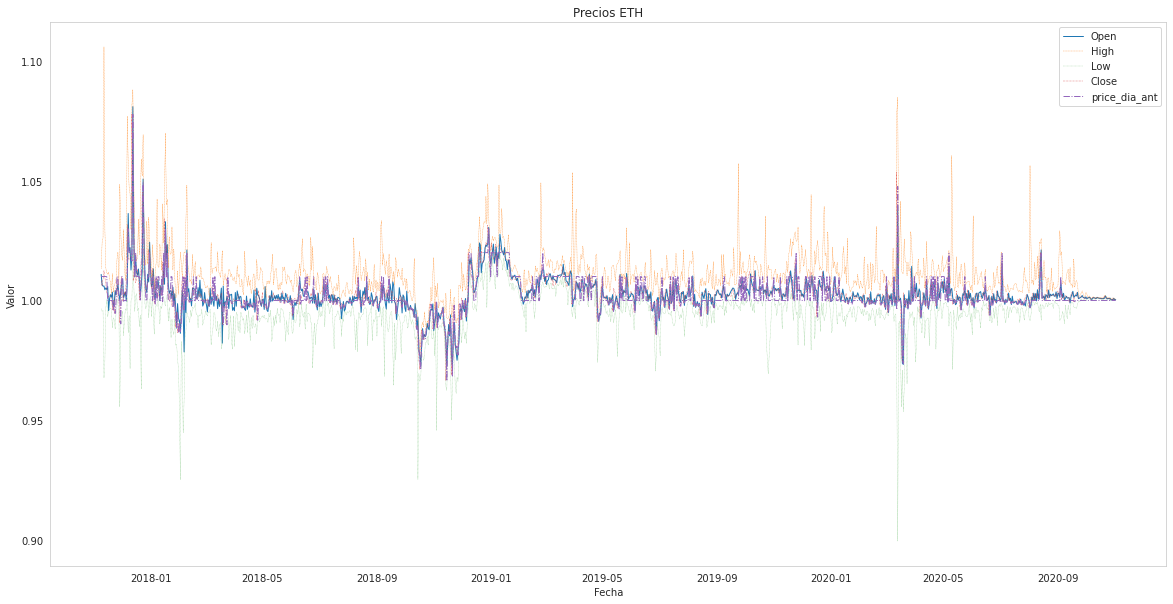

In [109]:
import matplotlib.pyplot as plt

USDT_I['Date']=USDT_I.index
USDT_I.head()

fig,ax= plt.subplots(figsize=(20,10))
ax.plot(USDT_I.Date, USDT_I.Open, label='Open',linewidth=1)
ax.plot(USDT_I.Date, USDT_I.High, label='High',linewidth=0.3,linestyle='--')
ax.plot(USDT_I.Date, USDT_I.Low, label='Low',linewidth=0.3,linestyle=':')
ax.plot(USDT_I.Date, USDT_I.Close, label='Close',linewidth=0.3,linestyle='dashdot')
ax.plot(USDT_I.Date, USDT_I.price_dia_ant, label='price_dia_ant',linewidth=1,linestyle='-.' )

ax.legend()
ax.grid()
ax.set_title('Precios ETH')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.show()

Vamos a analizar con mayor profundidad el caso del precio de cierre y el precio del día anterior:

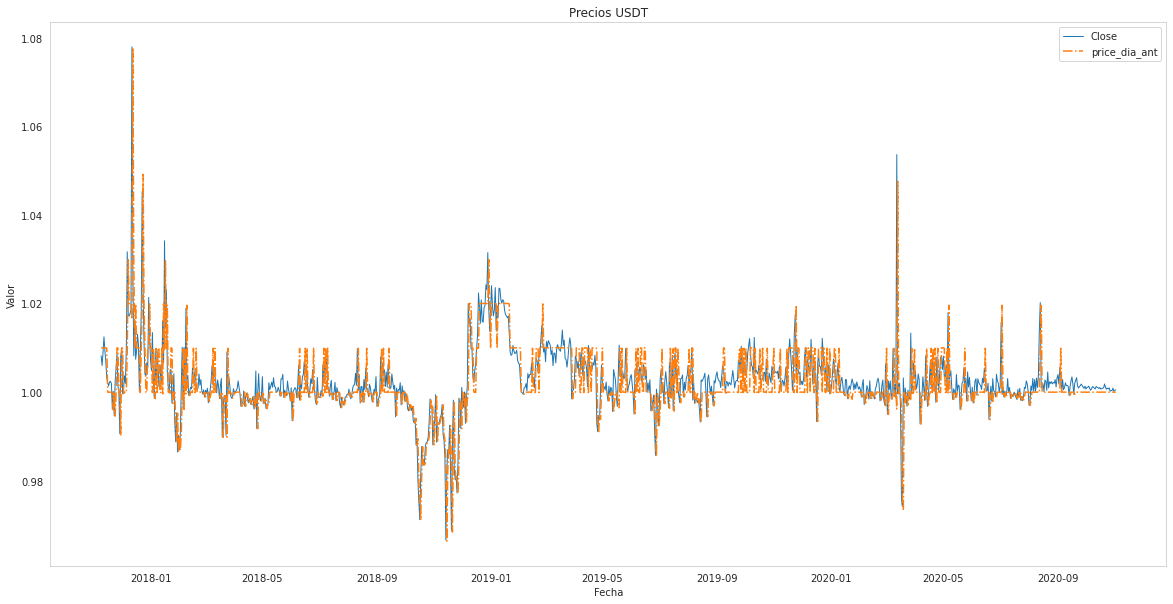

In [110]:
USDT_I['Date']=USDT_I.index
USDT_I.head()

fig,ax= plt.subplots(figsize=(20,10))
ax.plot(USDT_I.Date, USDT_I.Close, label='Close',linewidth=1,linestyle='-')
ax.plot(USDT_I.Date, USDT_I.price_dia_ant, label='price_dia_ant',linewidth=1.5,linestyle='-.' )

ax.legend()
ax.grid()
ax.set_title('Precios USDT')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.show()

En general, no vemos una variación importante de un día al otro. Lo confirmaremos con el gráfico de variación:

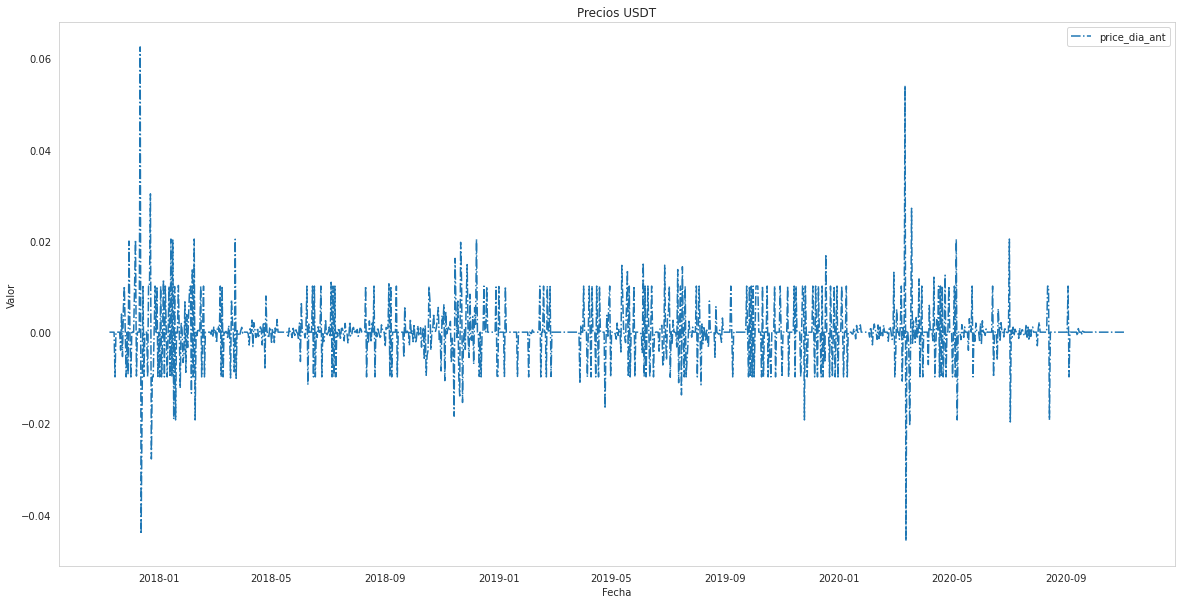

In [111]:
USDT_I['Date']=USDT_I.index
USDT_I.head()

fig,ax= plt.subplots(figsize=(20,10))
ax.plot(USDT_I.Date, USDT_I.variacion_precio, label='price_dia_ant',linewidth=1.5,linestyle='-.' )

ax.legend()
ax.grid()
ax.set_title('Precios USDT')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
plt.show()

En el gráfico de variación sí podemos observar algunas variaciones importantes de un día al otro en el año 2020 hacia mínimos y máximos en períodos de tiempo muy cortos, probablemente relacionado a los primeros meses de pandemia  y en inicios de 2018 se observa el mismo comportamiento.

Analizaremos las correlaciones entre las distintas variables:

In [112]:
USDT_I.corr()

market_cap  price_dia_ant  variacion_precio      Open  \
market_cap          1.000000      -0.124211         -0.002415 -0.093464   
price_dia_ant      -0.124211       1.000000         -0.423410  0.920047   
variacion_precio   -0.002415      -0.423410          1.000000 -0.305067   
Open               -0.093464       0.920047         -0.305067  1.000000   
High               -0.216981       0.607284          0.015430  0.612854   
Low                 0.120158       0.482384          0.041949  0.534187   
Close              -0.090034       0.641888          0.376070  0.670711   
Adj Close          -0.090034       0.641888          0.376070  0.670711   
Volume              0.666976      -0.061845         -0.009369 -0.035229   

                      High       Low     Close  Adj Close    Volume  
market_cap       -0.216981  0.120158 -0.090034  -0.090034  0.666976  
price_dia_ant     0.607284  0.482384  0.641888   0.641888 -0.061845  
variacion_precio  0.015430  0.041949  0.376070   0.376070 -0.009369  
Open              0.612854  0.534187  0.670711   0.670711 -0.035229  
High              1.000000  0.119194  0.635678   0.635678 -0.003196  
Low               0.119194  1.000000  0.539805   0.539805 -0.030657  
Close             0.635678  0.539805  1.000000   1.000000 -0.039386  
Adj Close         0.635678  0.539805  1.000000   1.000000 -0.039386  
Volume           -0.003196 -0.030657 -0.039386  -0.039386  1.000000

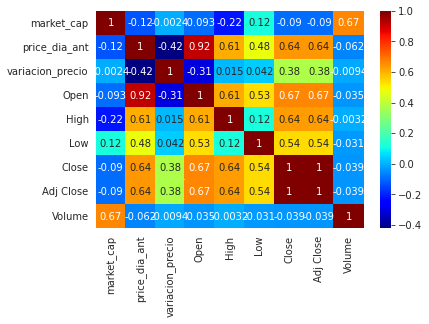

In [113]:
sns.heatmap(USDT_I.corr(),annot=True,cmap='jet')
plt.show()

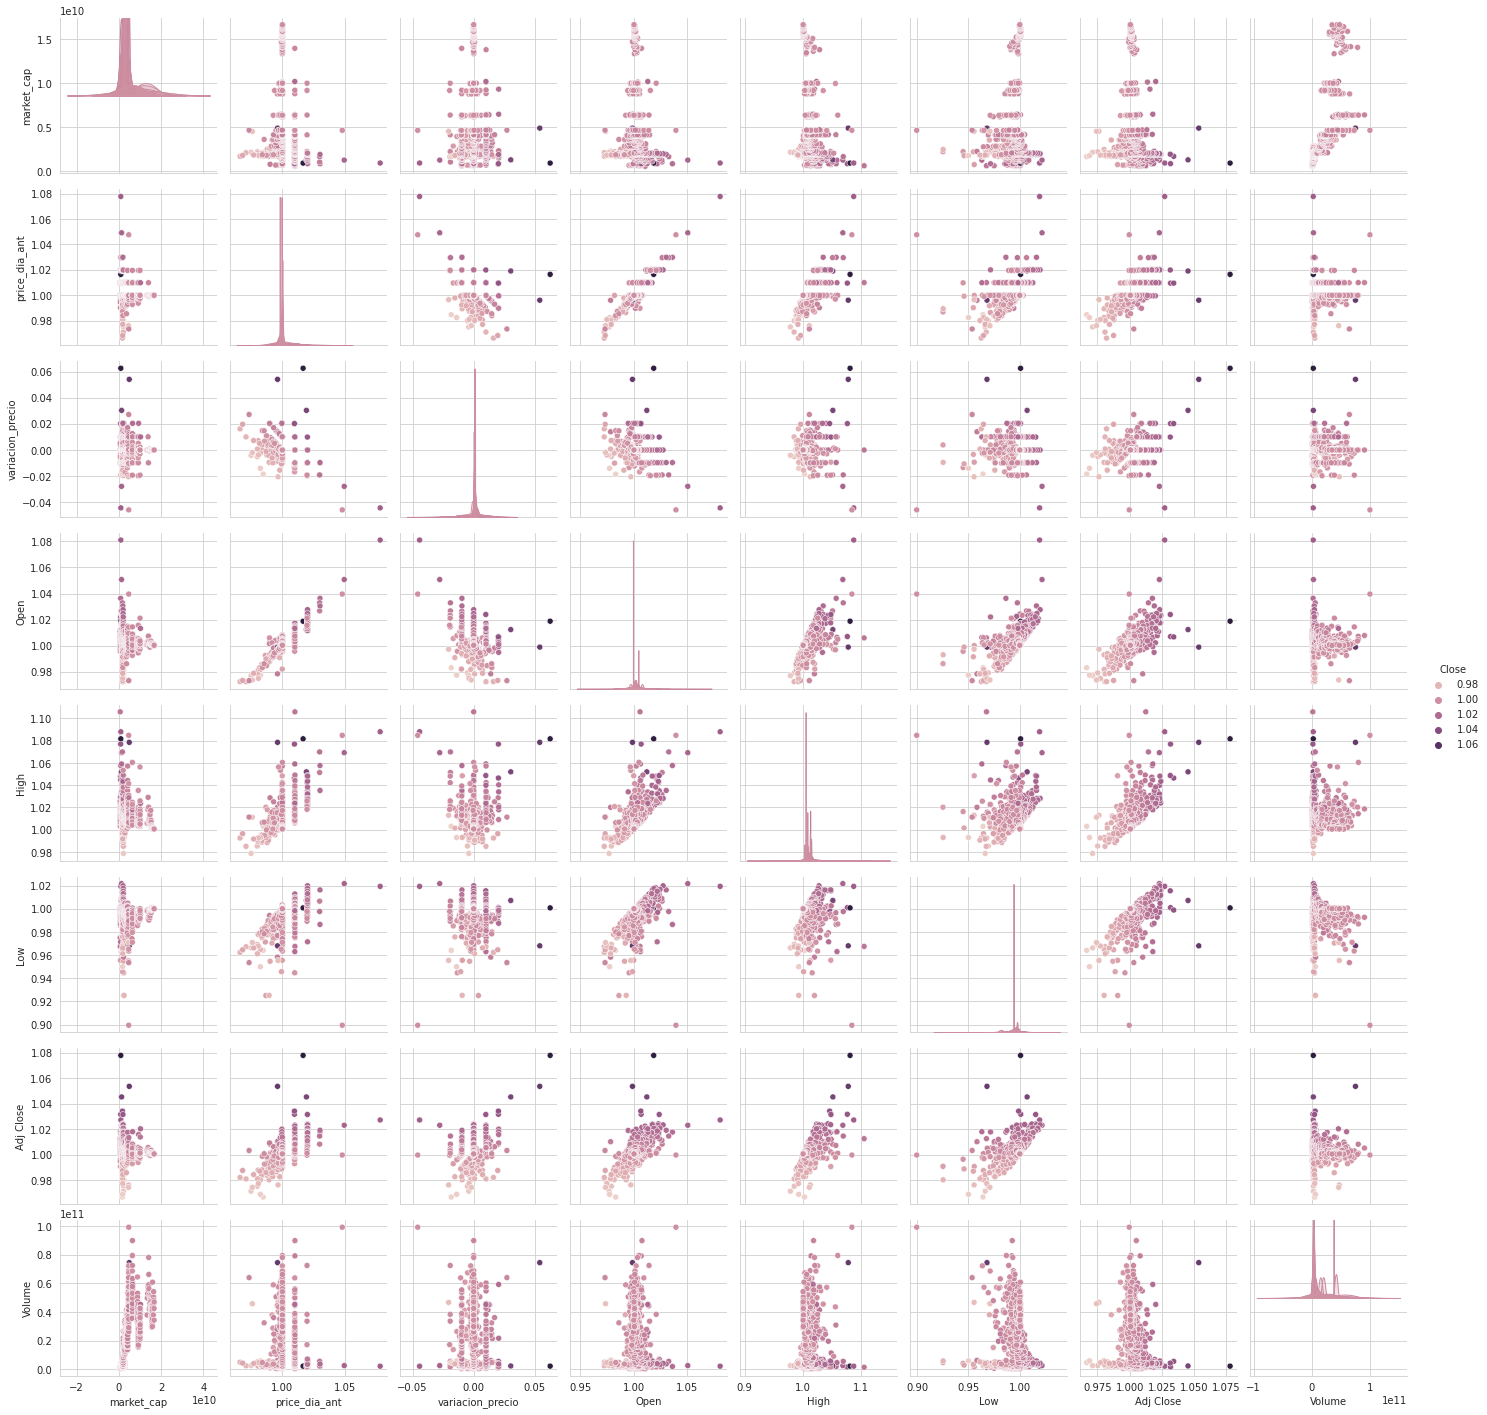

In [114]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from seaborn.relational import lineplot 

sns.pairplot(USDT_I,hue='Close')

En general, podemos observar que la variable que menos se correlaciona con todas es el market_cap, el volumen y la variación en el precio.  

Por otro lado, analizaremos la desviación de cada uno de los precios, para encontrar algunas conclusiones en torno a su comportamiento:

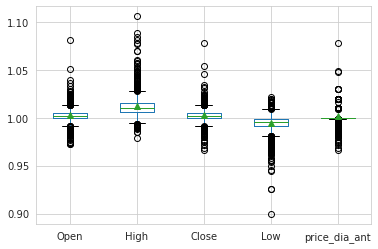

In [115]:
USDT_I.boxplot(showmeans=True, column=['Open','High','Close', 'Low','price_dia_ant'])

Lo más importante para cada uno de los valores, es que el tamaño de la caja no es muy grande, por lo cual los LS e LI están proximos a la mediana, pero existen muchos valores atípicos, probablemente vengan relacionados a los valores que observábamos en el gráfico lineal de las variaciones de precio. 

###¿Es USDT una inversión de Corto o Largo Plazo?

A partir de lo observado podemos suponer que se trata de una inversión de Largo Plazo:

In [116]:
USDT_I_close=USDT_I[['Close']]
USDT_I_close.head()

Close
date_f             
2017-11-09  1.00818
2017-11-10  1.00601
2017-11-11  1.00899
2017-11-12  1.01247
2017-11-13  1.00935

In [117]:
USDT_I_close['Date_2']=USDT_I_close.index
USDT_I_close

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Close     Date_2
date_f                         
2017-11-09  1.008180 2017-11-09
2017-11-10  1.006010 2017-11-10
2017-11-11  1.008990 2017-11-11
2017-11-12  1.012470 2017-11-12
2017-11-13  1.009350 2017-11-13
...              ...        ...
2020-10-29  1.000349 2020-10-29
2020-10-30  1.000904 2020-10-30
2020-10-31  1.000200 2020-10-31
2020-11-01  1.000379 2020-11-01
2020-11-02  1.000523 2020-11-02

[1072 rows x 2 columns]

In [136]:
import plotly.io as pio
pio.renderers.default = "browser"

fig_USDT=px.line(data_frame=USDT_I_close, x='Date_2',y='Close',title='Precio USDT', 
                 labels={"Date_2":"Fecha", "Close":"Precio"})
fig_USDT.update_layout(paper_bgcolor="#FFFFFa",plot_bgcolor='#FFFFFa',)


Error: ignored

Figure({
    'data': [{'hovertemplate': 'Fecha=%{x}<br>Precio=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array([datetime.datetime(2017, 11, 9, 0, 0),
                          datetime.datetime(2017, 11, 10, 0, 0),
                          datetime.datetime(2017, 11, 11, 0, 0), ...,
                          datetime.datetime(2020, 10, 31, 0, 0),
                          datetime.datetime(2020, 11, 1, 0, 0),
                          datetime.datetime(2020, 11, 2, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([1.00818002, 1.00601006, 1.00899005, ..., 1.00020003, 1.00037897,
                          1.00052297]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'paper_bgcolor': '#FFFFFa',
               'plot_bgcolor': '#FFFFFa',
               'template': '...',
               'title': {'text': 'Precio USDT'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Fecha'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Precio'}}}
})

Confirmamos que las variaciones en el precio no han sido significativas, sobre todo en el último período analizado.


In [119]:
df_USDT_close=df_USDT[['Close','date_f']]
df_USDT_close

Close     date_f
Date                           
2017-11-09  1.008180 2017-11-09
2017-11-10  1.006010 2017-11-10
2017-11-11  1.008990 2017-11-11
2017-11-12  1.012470 2017-11-12
2017-11-13  1.009350 2017-11-13
...              ...        ...
2022-09-25  1.000055 2022-09-25
2022-09-26  0.999990 2022-09-26
2022-09-27  0.999980 2022-09-27
2022-09-28  0.999976 2022-09-28
2022-09-29  1.000079 2022-09-29

[1786 rows x 2 columns]

In [120]:
import plotly.graph_objects as go # importamos los objetos de plotly
import plotly.express as px

fig_USDT=px.line(data_frame=df_USDT_close, x='date_f',y='Close',title='Precio USDT', 
                 labels={"date_f":"Fecha", "Close":"Precio"})
fig_USDT.update_layout(paper_bgcolor="#FFFFFa",plot_bgcolor='#FFFFFa',)

fig_USDT.show()

Vemos como ampliando la serie, a través de los datos de la API, desde 2020 los valores permanecen bastante estables, por lo cual podemos decir que se trata de una inversión de corto plazo. 

###¿Podremos predecir el valor futuro?

Intentaremos hacer una aproximación a través del modelo ARIMA para series de tiempo:

Primero suavizaremos las fluctuaciones a corto plazo y expondremos las tendencias a largo plazo en los datos. Luego, intentaremos descomponer la serie de tiempo en su tendencia, su estacionalidad y sus factores residuales. 

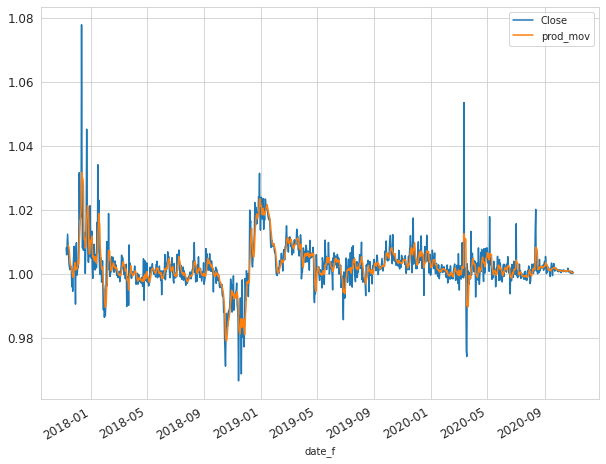

In [121]:

USDT_I_ma = USDT_I['Close'].rolling(window= 5).mean()
USDT_I['prod_mov'] = USDT_I_ma
plot = USDT_I[['Close', 'prod_mov']].plot(figsize=(10, 8), fontsize=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



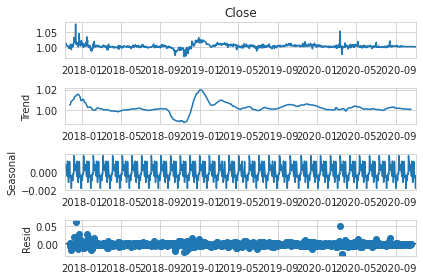

In [122]:
# Ejemplo de descomposición de serie de tiempo
import statsmodels.api as sm 
descomposicion = sm.tsa.seasonal_decompose(USDT_I['Close'],
                                                  model='additive', freq=30)  
fig = descomposicion.plot()

La serie de tiempo tiene un comportamiento aleatorio y las medidas móviles tampoco parecen ayudar a encontrar la estacionalidad. Intentaremos igualmente aplicar ARIMA. El modelo ARIMA aplica los conceptos  de regresión a las series de tiempo; Las variables independientes son valores del pasado. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



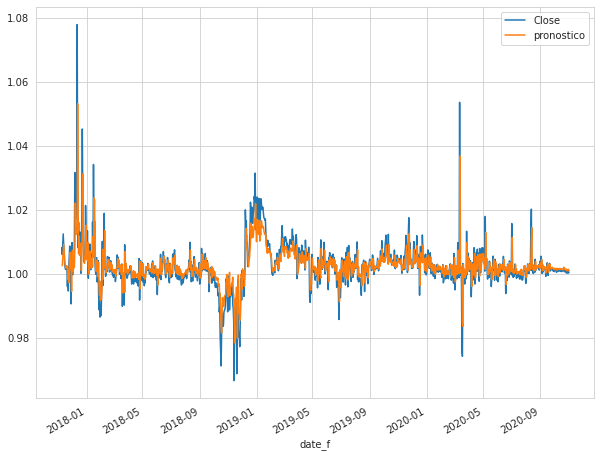

In [123]:
modelo = sm.tsa.ARIMA(USDT_I['Close'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
USDT_I['pronostico'] = resultados.fittedvalues  
plot = USDT_I[['Close', 'pronostico']].plot(figsize=(10, 8)) 

El modelo parece efectivo

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



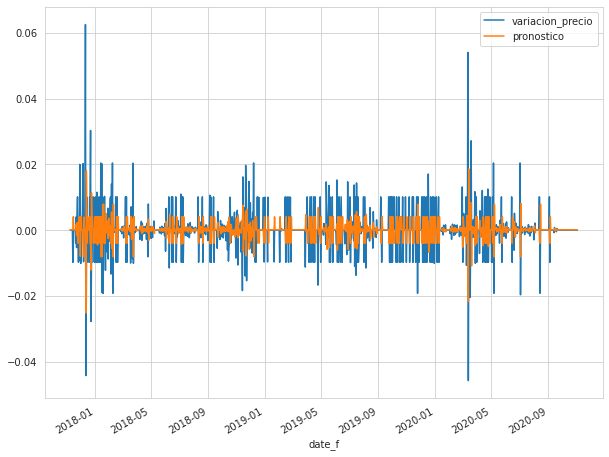

In [124]:
# ARIMA sobre variación diaria
modelo = sm.tsa.ARIMA(USDT_I['variacion_precio'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
USDT_I['pronostico'] = resultados.fittedvalues  
plot = USDT_I[['variacion_precio', 'pronostico']].plot(figsize=(10, 8)) 

El modelo predice variaciones bastante cercanas a las que se produjeron en la realidad. Podremos proceder a hacer una estimación:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmode

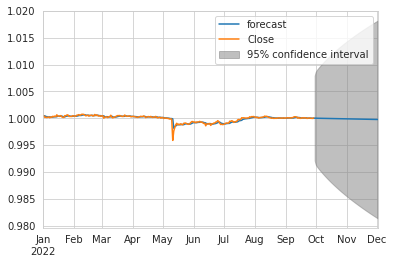

In [125]:
from statsmodels.tsa.arima_model import ARIMA
mod = ARIMA(df_USDT_close['Close'], order=(1,1,1))
res = mod.fit() 
fig2 = res.plot_predict(start='2022-01-01', end='2022-12-02')
fig2.show()

El modelo es efectivo para predecir los valores.

Haremos las pruebas de regresión con las otras variables, pero en principio ARIMA nos acerca bastante al pronóstico objetivo.

In [126]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)
# var dep ~ vars indepen, + añade nuevas columnas
model1 = 'Close~Volume+market_cap+price_dia_ant+variacion_precio' 
# crea un modelo/regresión para las variables y se ajusta con .fit()
lm1 = smf.ols(formula = model1, data = USDT_I).fit()
# se presenta un resumen de los residuos del modelo
print(lm1.summary()) 
# OLS es ordinary least squares

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     3271.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:58:23   Log-Likelihood:                 5129.7
No. Observations:                1072   AIC:                        -1.025e+04
Df Residuals:                    1067   BIC:                        -1.022e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0698      0.009  

Excluimos del modelo Volume y market_cap por tener valores de p>0,005

In [127]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)
# var dep ~ vars indepen, + añade nuevas columnas
model1 = 'Close~price_dia_ant+variacion_precio' 
# crea un modelo/regresión para las variables y se ajusta con .fit()
lm1 = smf.ols(formula = model1, data = USDT_I).fit()
# se presenta un resumen de los residuos del modelo
print(lm1.summary()) 
# OLS es ordinary least squares

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     6444.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:58:23   Log-Likelihood:                 5121.3
No. Observations:                1072   AIC:                        -1.024e+04
Df Residuals:                    1069   BIC:                        -1.022e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0748      0.009  

Variable dependiente es 'Close', usamos OLS conocidos como mínimos cuadrados ordinarios.

El número de observaciones es significativo. Df Residuals es otro nombre para nuestros Grados de Libertad en nuestro modo.

Df model es el número de nuestras variables de predicción (price_dia_ant,variacion_precio).

Nuestro tipo de covarianza aparece como no robusto. Una covarianza robusta es aquella que se calcula de manera que se minimicen o eliminen las variables, lo que no es el caso aquí.

R-squared es la medida de cuánto de la variable dependiente se explica por cambios en nuestras variables independientes. En términos porcentuales, 0,923 significaría que nuestro modelo explica el 92.3% del cambio en nuestra variable 'Close'.

El Adj R-squared penaliza la fórmula R-squared en función del número de variables, por lo tanto, una puntuación ajustada más baja puede indicarle que algunas variables no están contribuyendo correctamente al R-squared de su modelo.En nuestro caso esto no sucede ya que el valor es igual al 92,3%

Según este modelo, el precio del USDT tiene una relación positiva con el precio del día anterior y la variación del precio.

A partir de nuestra fórmula Close~price_dia_ant+variacion_precio , se muestra las variables independientes, en nuestro caso son: price_dia_ant, variacion_precio.

El std err es una estimación de la desviación estándar del coeficiente, una medida de la cantidad de variación en el coeficiente a lo largo de sus puntos de datos.

La t está relacionada y es una medida de la precisión con la que se midió el coeficiente, estás se calculan asumiendo la siguiente hipótesis

H0 : La variable X no influye en Y HA : X tiene un impacto significativo en Y

En teoría, leemos que el valores-p es la probabilidad de obtener el estadístico t para rechazar con H0 En la tabla de resumen, podemos ver que el valor-p para ambos parámetros es igual a 0. Esto no es exactamente 0, pero como tenemos estadísticos t muy grandes el valor p será aproximadamente 0.

Otra forma de probar la hipotesis, es incluir el enfoque de intervalos de confianza, esto nos dice que la estimación del parámetro corresponiente tiene el 95% de estar entre las cotas marcadas.

Ninguna de las variables tiene un pvalue no significativo, por lo cual pueden mantenerse todas en el modelo.

Control de Underflight u Overflights
Es probable que nuestri modelo al tener un valor R cuadrado del 98% esté sobreajustado, por eso deberemos realizar el test para poder comprobarlo:

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets 
from sklearn.model_selection import train_test_split # para dividir el dataset
from sklearn.linear_model import LinearRegression # para hacer una regresión lineal
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error # metricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

USDT_I_x = USDT_I[['Volume','market_cap','price_dia_ant','variacion_precio']]
USDT_I_y = USDT_I['Close']

sns.set_style('whitegrid')
# dividimos el dataset
X_train,X_test,y_train,y_test = train_test_split(USDT_I_x,USDT_I_y,test_size=0.2,random_state=2) 

# instanciamos el modelo
lr = LinearRegression()

# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)

# hacemos una predeción con datos nuevos de X_test
y_pred = lr.predict(X_test)

In [129]:
# Calculamos el MAE
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.001654583417122625


In [130]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 4.469376616262175e-06


Este no es tan alejado de cero, por lo cual nos daría en principio un modelo robusto.

In [131]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.002114090020851093


In [132]:
print("r2", r2_score(y_test,y_pred))

r2 0.8846489778540725


El modelo en primera instancia permitiría predecir de manera bastante cercana el valor del precio de cierre. 

In [133]:
y_pred=lr.predict(X_test)

#Conclusiones y futuras líneas


A partir de la información analizada, pudimos responder a las preguntas que nos hicimos al inicio:

1. ETH y BTC son inversiones de largo plazo: el inversor debe estar dispuesto a mantener el dinero invertido durante largos períodos de tiempo para poder obtener beneficios. Para estos casos, siempre es preferible ingresar en precios bajos y obtener ganancias en los precios altos o en el largo plazo. 

2. USDT es una inversión de corto plazo, o puede utilizarse como refugio de valor. Sus variaciones no son tan fuertes, se mantienen alrededor de la media. El inversor o ahorrista podría utilizarlas para no perder el valor de su moneda en períodos cortos de tiempo o bien, proteger su dinero de la inestabilidad de la moneda local. 

3. En principio el modelo ARIMA no nos permite predecir el valor futuro de ETH y BTC, la regresión parece robusta, pero es necesario seguir haciendo más pruebas. Según los datos obtenidos tanto ETH como BTC mantienen una relación positiva con market_ cap, variacion del precio, precio del día anterior y negativa con el volumen operado. A su vez las dos primeras variables son las que mantienen mayor relación con el precio de cierre. 

4. El modelo ARIMA nos permitiría obtener un valor bastante aproximado de la realidad para el USDT. La regresión resultó robusta utilizando sólo 2 variables independientes: precio del día anterior y variación del precio. 

5. Deberán hacerse mayores análisis para poder establecer patrones de cambio de tendencia. 